# 1. Pendahuluan

Selamat datang pada pengerjaan Segmentasi Customer dengan Unsupervised Machine Learning. Semoga file ini dapat memberikan informasi mengenai kemampuan saya.

## 1.1 Identitas

Pembuat file ini adalah: Haidar Farras Latief

## 1.2 Deskripsi File ini

File ini (Customer_Segmentation_Haidar_Farras_Latief.ipynb) adalah file pengerjaan segmentasi customer dengan machine learning. Pengerjaan file ini pada awalnya merupakan tugas yang diberikan dari Hacktiv8 untuk menilai apakah saya sudah menguasai teknik unsupervised machine learning. Sebagai portofolio saya, saya melakukan beberapa perubahan yang saya beritahukan pada bagian selanjutnya. Tujuan utama perubahan adalah untuk menyesuaikan dengan kebutuhan protofolio dan memperbaiki pengerjaan yang dikoreksi oleh instruktur maupun yang dianggap oleh saya sendiri perlu diperbaiki.
<br>
<br>
Dataset yang akan digunakan pada pengerjaan ini saya dapat dari BigQuery Hacktiv8 dengan filter hanya mengambil identitas customer yang bernomor ganjil. 

## 1.3 Tujuan

### 1.3.1 Tujuan Utama

Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank dibawah ini. Data ini merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir.

### 1.3.2 Pertanyaan

Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

## 1.4 Analysis Objectives

Segmentasi customer dari data kartu kredit customer yang menyimpan informasi penggunaan kartu kredit selama 6 bulan terakhir.

# 2. Mempersiapkan Data

## 2.1 Mengunduh Pustaka

In [1]:
# 1. Pustaka dasar python
# 1.1 Untuk manipulasi dataframe
import pandas as pd
# 1.2 Untuk manipulasi array
import numpy as np
# 1.3 Untuk visualisasi data
import matplotlib.pyplot as plt
# 1.4 Untuk membantu visualisasi data yang dilakukan oleh matplotlib.pyplot / plt
import seaborn as sns

# 2. Pustaka Data Pre-Processing
# 2.1 Untuk membuat heatmap
import phik
# 2.2 untuk membuat pemisahan pada data latih dan data ujian
from sklearn.model_selection import train_test_split
# 2.3 Untuk melakukan capping
from feature_engine.outliers import Winsorizer
# 2.4 Untuk melakukan scaling pada kolom-kolom numerikal
from sklearn.preprocessing import StandardScaler
# 2.5 Untuk melakukan proses VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 2.6 Untuk melakukan proses PCA
from sklearn.decomposition import PCA

# 3. Pustaka Clustering Model
# 3.1 untuk melakukan clustering PCA
from sklearn.cluster import KMeans
# 3.2 Untuk melakukan pengamatan dengan penilaian silhouette
from sklearn.metrics import silhouette_score, silhouette_samples
# 3.3 Untuk melakukan pengamatan dengan penilaian davies bouldin dan calinski harabasz
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
# 3.4 Untuk melakukan pengamatan dengan diagram silhouette
from yellowbrick.cluster import SilhouetteVisualizer
# 3.5 Untuk membuat clustering agglomerative
from sklearn.cluster import AgglomerativeClustering
# 3.6 Untuk melakukan clustering spectral
from sklearn.cluster import SpectralClustering

## 2.2 Mengunduh Dataset

Saya mengunduh dataset melalui BigQuery dengan query sebagai berikut:
```
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_001_hck.credit-card-information`
WHERE mod(CUST_ID,2) <> 0;
```

## 2.3 Menyambungkan dengan file ipynb ini

In [2]:
df = pd.read_csv('customer_segmentation_dataset_haidar_farras_latief.csv')

## 2.4 Melihat isi dataset

In [3]:
df.head(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8


In [4]:
df.tail(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUST_ID,4475.0,4475.000000,2583.931114,1.000000,2238.000000,4475.000000,6712.000000,8949.00000
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000


# 3. Problem Utama

## 3.1 Data-Preprocessing

### 3.1.1 Dropping Uneccessary Column

Kolom CUST_ID adalah kolom yang memiliki value sebagai identitas, sehingga tidak dapat dimasukan kepada clustering.

In [7]:
df.drop(columns='CUST_ID', inplace=True)

### 3.1.2 Handling Missing Value

In [8]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    155
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
CREDIT_LIMIT                          0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

Saya memilih untuk menjadikan data missing value karena data akan menjadi sedikit jika di drop.

In [9]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].median()

In [10]:
df.isna().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

### 3.1.3 Pemisahan Data Train dan Test

In [11]:
train, test = train_test_split(df, test_size=0.2, random_state=114)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (3580, 17)
Test size:  (895, 17)


### 3.1.4 Handling Outliers

#### 3.1.4.1 Definisi fungsi untuk penanganan outlier

##### 3.1.4.1.1 find_skewed_boundaries

In [12]:
# untuk menampilkan garis bawah dan atas pada data ini
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

##### 3.1.4.1.2 diagnostic_plots

In [13]:
def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

#### 3.1.4.2 Melihat Outlier

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

##### 3.1.4.2.1 BALANCE

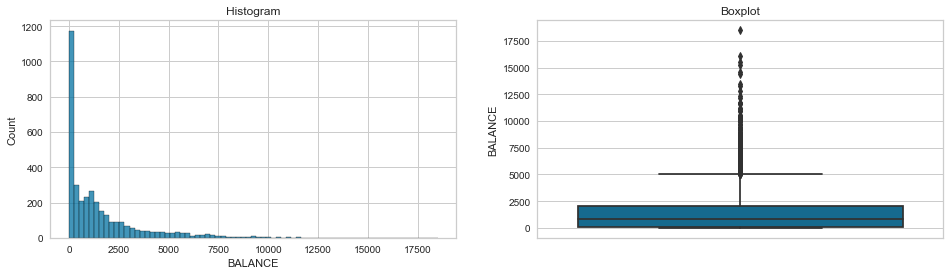


Nama variabel: BALANCE

Nilai Skewness:  2.3231477673358394
Batas bawah BALANCE: 7950.7485025000005
Batas atas BALANCE: -5745.17512525

Outliers bawah BALANCE : 3513
Outliers atas BALANCE : 3580


In [15]:
diagnostic_plots(train, 'BALANCE')
print('\nNama variabel: BALANCE')
print('\nNilai Skewness: ', train['BALANCE'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'BALANCE', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah BALANCE:',skew_lower_bound)
print('Batas atas BALANCE:',skew_upper_bound)
print('')
print('Outliers bawah BALANCE : {}'.format(len(train[train['BALANCE'] < skew_lower_bound])))
print('Outliers atas BALANCE : {}'.format(len(train[train['BALANCE'] > skew_upper_bound])))

##### 3.1.4.2.2 BALANCE_FREQUENCY

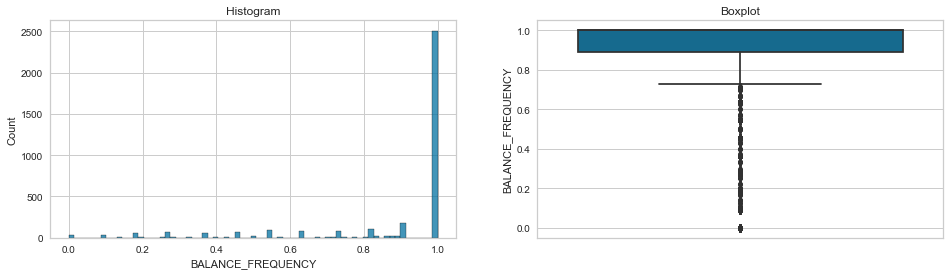


Nama variabel: BALANCE_FREQUENCY

Nilai Skewness:  -2.032161118439176
Batas bawah BALANCE_FREQUENCY: 1.3333329999999999
Batas atas BALANCE_FREQUENCY: 0.5555560000000002

Outliers bawah BALANCE_FREQUENCY : 3580
Outliers atas BALANCE_FREQUENCY : 3100


In [16]:
diagnostic_plots(train, 'BALANCE_FREQUENCY')
print('\nNama variabel: BALANCE_FREQUENCY')
print('\nNilai Skewness: ', train['BALANCE_FREQUENCY'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'BALANCE_FREQUENCY', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah BALANCE_FREQUENCY:',skew_lower_bound)
print('Batas atas BALANCE_FREQUENCY:',skew_upper_bound)
print('')
print('Outliers bawah BALANCE_FREQUENCY : {}'.format(len(train[train['BALANCE_FREQUENCY'] < skew_lower_bound])))
print('Outliers atas BALANCE_FREQUENCY : {}'.format(len(train[train['BALANCE_FREQUENCY'] > skew_upper_bound])))

##### 3.1.4.2.3 PURCHASES

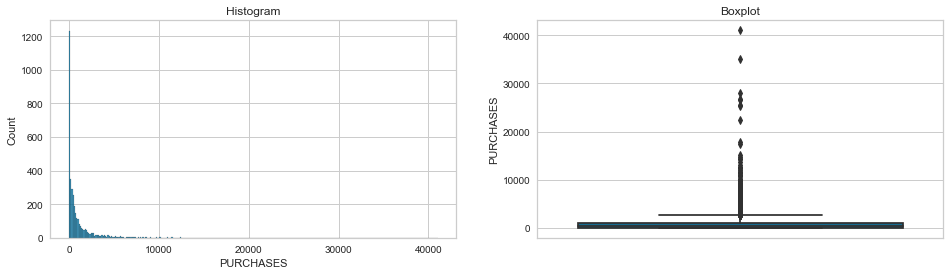


Nama variabel: PURCHASES

Nilai Skewness:  7.443100036151177
Batas bawah PURCHASES: 4152.422500000001
Batas atas PURCHASES: -3046.2200000000003

Outliers bawah PURCHASES : 3404
Outliers atas PURCHASES : 3580


In [17]:
diagnostic_plots(train, 'PURCHASES')
print('\nNama variabel: PURCHASES')
print('\nNilai Skewness: ', train['PURCHASES'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PURCHASES', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PURCHASES:',skew_lower_bound)
print('Batas atas PURCHASES:',skew_upper_bound)
print('')
print('Outliers bawah PURCHASES : {}'.format(len(train[train['PURCHASES'] < skew_lower_bound])))
print('Outliers atas PURCHASES : {}'.format(len(train[train['PURCHASES'] > skew_upper_bound])))

##### 3.1.4.2.4 ONEOFF_PURCHASES

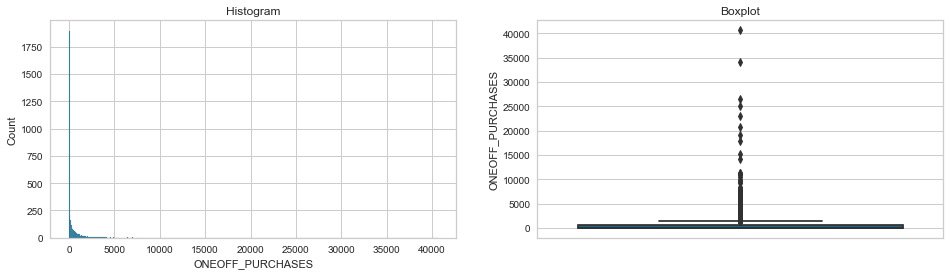


Nama variabel: ONEOFF_PURCHASES

Nilai Skewness:  10.501492943747632
Batas bawah ONEOFF_PURCHASES: 2224.12
Batas atas ONEOFF_PURCHASES: -1668.09

Outliers bawah ONEOFF_PURCHASES : 3340
Outliers atas ONEOFF_PURCHASES : 3580


In [18]:
diagnostic_plots(train, 'ONEOFF_PURCHASES')
print('\nNama variabel: ONEOFF_PURCHASES')
print('\nNilai Skewness: ', train['ONEOFF_PURCHASES'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'ONEOFF_PURCHASES', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah ONEOFF_PURCHASES:',skew_lower_bound)
print('Batas atas ONEOFF_PURCHASES:',skew_upper_bound)
print('')
print('Outliers bawah ONEOFF_PURCHASES : {}'.format(len(train[train['ONEOFF_PURCHASES'] < skew_lower_bound])))
print('Outliers atas ONEOFF_PURCHASES : {}'.format(len(train[train['ONEOFF_PURCHASES'] > skew_upper_bound])))

##### 3.1.4.2.5 INSTALLMENTS_PURCHASES

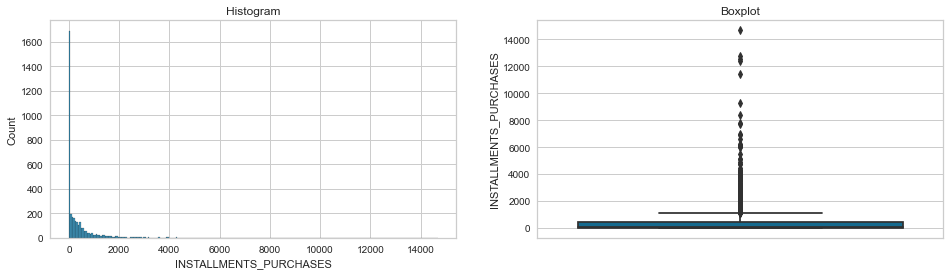


Nama variabel: INSTALLMENTS_PURCHASES

Nilai Skewness:  6.353678499860504
Batas bawah INSTALLMENTS_PURCHASES: 1816.21
Batas atas INSTALLMENTS_PURCHASES: -1362.1575

Outliers bawah INSTALLMENTS_PURCHASES : 3402
Outliers atas INSTALLMENTS_PURCHASES : 3580


In [19]:
diagnostic_plots(train, 'INSTALLMENTS_PURCHASES')
print('\nNama variabel: INSTALLMENTS_PURCHASES')
print('\nNilai Skewness: ', train['INSTALLMENTS_PURCHASES'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'INSTALLMENTS_PURCHASES', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah INSTALLMENTS_PURCHASES:',skew_lower_bound)
print('Batas atas INSTALLMENTS_PURCHASES:',skew_upper_bound)
print('')
print('Outliers bawah INSTALLMENTS_PURCHASES : {}'.format(len(train[train['INSTALLMENTS_PURCHASES'] < skew_lower_bound])))
print('Outliers atas INSTALLMENTS_PURCHASES : {}'.format(len(train[train['INSTALLMENTS_PURCHASES'] > skew_upper_bound])))

##### 3.1.4.2.6 CASH_ADVANCE

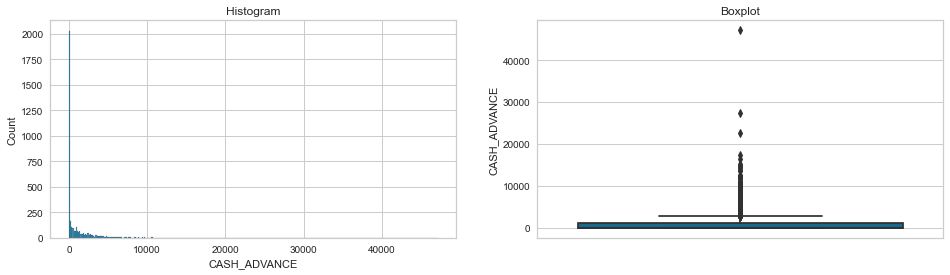


Nama variabel: CASH_ADVANCE

Nilai Skewness:  5.991116593921357
Batas bawah CASH_ADVANCE: 4527.398723
Batas atas CASH_ADVANCE: -3395.54904225

Outliers bawah CASH_ADVANCE : 3385
Outliers atas CASH_ADVANCE : 3580


In [20]:
diagnostic_plots(train, 'CASH_ADVANCE')
print('\nNama variabel: CASH_ADVANCE')
print('\nNilai Skewness: ', train['CASH_ADVANCE'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'CASH_ADVANCE', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah CASH_ADVANCE:',skew_lower_bound)
print('Batas atas CASH_ADVANCE:',skew_upper_bound)
print('')
print('Outliers bawah CASH_ADVANCE : {}'.format(len(train[train['CASH_ADVANCE'] < skew_lower_bound])))
print('Outliers atas CASH_ADVANCE : {}'.format(len(train[train['CASH_ADVANCE'] > skew_upper_bound])))

##### 3.1.4.2.7 PURCHASES_FREQUENCY

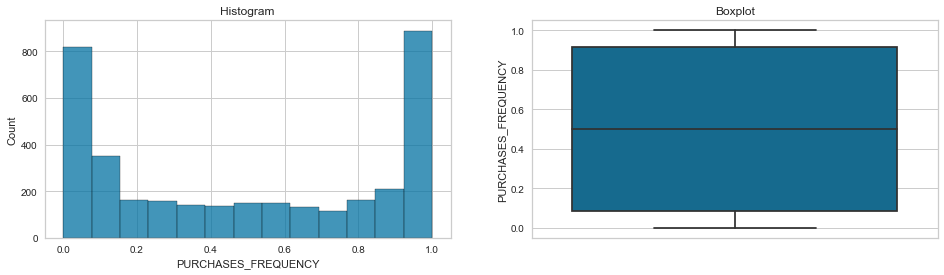


Nama variabel: PURCHASES_FREQUENCY

Nilai Skewness:  0.06444504853021195
Batas bawah PURCHASES_FREQUENCY: 3.416669
Batas atas PURCHASES_FREQUENCY: -2.416669

Outliers bawah PURCHASES_FREQUENCY : 3580
Outliers atas PURCHASES_FREQUENCY : 3580


In [21]:
diagnostic_plots(train, 'PURCHASES_FREQUENCY')
print('\nNama variabel: PURCHASES_FREQUENCY')
print('\nNilai Skewness: ', train['PURCHASES_FREQUENCY'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PURCHASES_FREQUENCY', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PURCHASES_FREQUENCY:',skew_lower_bound)
print('Batas atas PURCHASES_FREQUENCY:',skew_upper_bound)
print('')
print('Outliers bawah PURCHASES_FREQUENCY : {}'.format(len(train[train['PURCHASES_FREQUENCY'] < skew_lower_bound])))
print('Outliers atas PURCHASES_FREQUENCY : {}'.format(len(train[train['PURCHASES_FREQUENCY'] > skew_upper_bound])))

##### 3.1.4.2.7 ONEOFF_PURCHASES_FREQUENCY

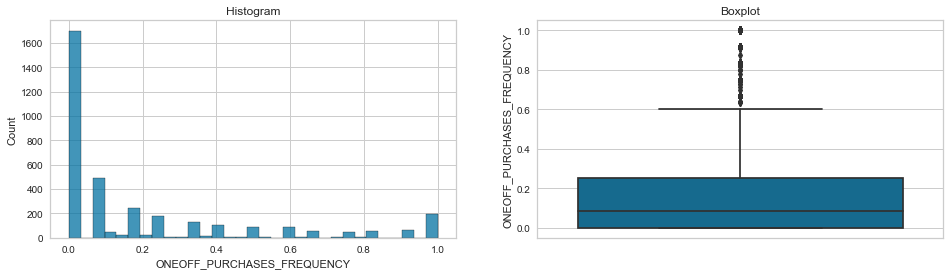


Nama variabel: ONEOFF_PURCHASES_FREQUENCY

Nilai Skewness:  1.588529662555168
Batas bawah ONEOFF_PURCHASES_FREQUENCY: 1.0
Batas atas ONEOFF_PURCHASES_FREQUENCY: -0.75

Outliers bawah ONEOFF_PURCHASES_FREQUENCY : 3386
Outliers atas ONEOFF_PURCHASES_FREQUENCY : 3580


In [22]:
diagnostic_plots(train, 'ONEOFF_PURCHASES_FREQUENCY')
print('\nNama variabel: ONEOFF_PURCHASES_FREQUENCY')
print('\nNilai Skewness: ', train['ONEOFF_PURCHASES_FREQUENCY'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'ONEOFF_PURCHASES_FREQUENCY', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah ONEOFF_PURCHASES_FREQUENCY:',skew_lower_bound)
print('Batas atas ONEOFF_PURCHASES_FREQUENCY:',skew_upper_bound)
print('')
print('Outliers bawah ONEOFF_PURCHASES_FREQUENCY : {}'.format(len(train[train['ONEOFF_PURCHASES_FREQUENCY'] < skew_lower_bound])))
print('Outliers atas ONEOFF_PURCHASES_FREQUENCY : {}'.format(len(train[train['ONEOFF_PURCHASES_FREQUENCY'] > skew_upper_bound])))

##### 3.1.4.2.8 PURCHASES_INSTALLMENTS_FREQUENCY

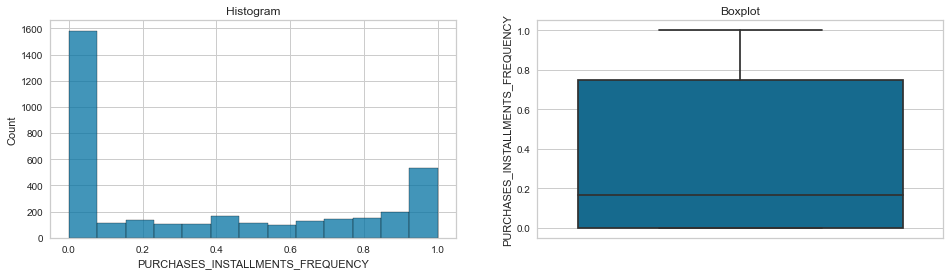


Nama variabel: PURCHASES_INSTALLMENTS_FREQUENCY

Nilai Skewness:  0.4986266541394554
Batas bawah PURCHASES_INSTALLMENTS_FREQUENCY: 3.0
Batas atas PURCHASES_INSTALLMENTS_FREQUENCY: -2.25

Outliers bawah PURCHASES_INSTALLMENTS_FREQUENCY : 3580
Outliers atas PURCHASES_INSTALLMENTS_FREQUENCY : 3580


In [23]:
diagnostic_plots(train, 'PURCHASES_INSTALLMENTS_FREQUENCY')
print('\nNama variabel: PURCHASES_INSTALLMENTS_FREQUENCY')
print('\nNilai Skewness: ', train['PURCHASES_INSTALLMENTS_FREQUENCY'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PURCHASES_INSTALLMENTS_FREQUENCY', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PURCHASES_INSTALLMENTS_FREQUENCY:',skew_lower_bound)
print('Batas atas PURCHASES_INSTALLMENTS_FREQUENCY:',skew_upper_bound)
print('')
print('Outliers bawah PURCHASES_INSTALLMENTS_FREQUENCY : {}'.format(len(train[train['PURCHASES_INSTALLMENTS_FREQUENCY'] < skew_lower_bound])))
print('Outliers atas PURCHASES_INSTALLMENTS_FREQUENCY : {}'.format(len(train[train['PURCHASES_INSTALLMENTS_FREQUENCY'] > skew_upper_bound])))

##### 3.1.4.2.9 CASH_ADVANCE_FREQUENCY

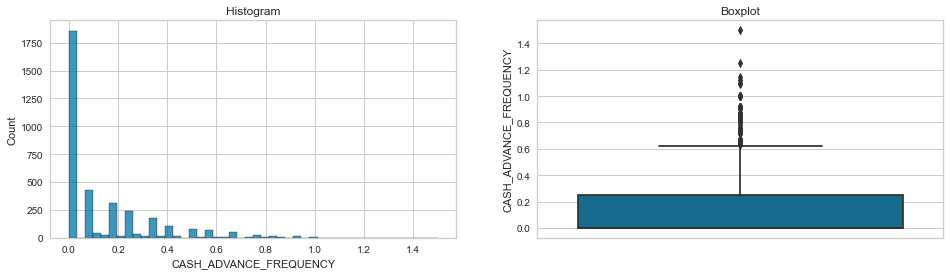


Nama variabel: CASH_ADVANCE_FREQUENCY

Nilai Skewness:  1.8811423311265634
Batas bawah CASH_ADVANCE_FREQUENCY: 1.0
Batas atas CASH_ADVANCE_FREQUENCY: -0.75

Outliers bawah CASH_ADVANCE_FREQUENCY : 3564
Outliers atas CASH_ADVANCE_FREQUENCY : 3580


In [24]:
diagnostic_plots(train, 'CASH_ADVANCE_FREQUENCY')
print('\nNama variabel: CASH_ADVANCE_FREQUENCY')
print('\nNilai Skewness: ', train['CASH_ADVANCE_FREQUENCY'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'CASH_ADVANCE_FREQUENCY', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah CASH_ADVANCE_FREQUENCY:',skew_lower_bound)
print('Batas atas CASH_ADVANCE_FREQUENCY:',skew_upper_bound)
print('')
print('Outliers bawah CASH_ADVANCE_FREQUENCY : {}'.format(len(train[train['CASH_ADVANCE_FREQUENCY'] < skew_lower_bound])))
print('Outliers atas CASH_ADVANCE_FREQUENCY : {}'.format(len(train[train['CASH_ADVANCE_FREQUENCY'] > skew_upper_bound])))

##### 3.1.4.2.10 CASH_ADVANCE_TRX

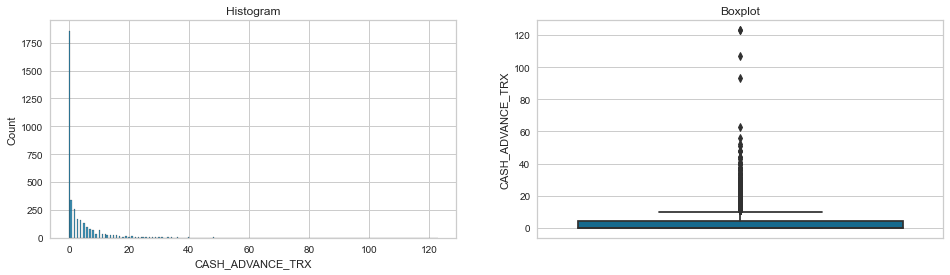


Nama variabel: CASH_ADVANCE_TRX

Nilai Skewness:  6.2975054364347445
Batas bawah CASH_ADVANCE_TRX: 16.0
Batas atas CASH_ADVANCE_TRX: -12.0

Outliers bawah CASH_ADVANCE_TRX : 3405
Outliers atas CASH_ADVANCE_TRX : 3580


In [25]:
diagnostic_plots(train, 'CASH_ADVANCE_TRX')
print('\nNama variabel: CASH_ADVANCE_TRX')
print('\nNilai Skewness: ', train['CASH_ADVANCE_TRX'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'CASH_ADVANCE_TRX', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah CASH_ADVANCE_TRX:',skew_lower_bound)
print('Batas atas CASH_ADVANCE_TRX:',skew_upper_bound)
print('')
print('Outliers bawah CASH_ADVANCE_TRX : {}'.format(len(train[train['CASH_ADVANCE_TRX'] < skew_lower_bound])))
print('Outliers atas CASH_ADVANCE_TRX : {}'.format(len(train[train['CASH_ADVANCE_TRX'] > skew_upper_bound])))

##### 3.1.4.2.11 PURCHASES_TRX

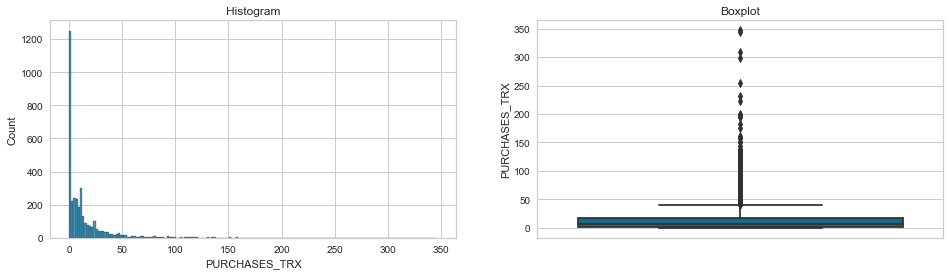


Nama variabel: PURCHASES_TRX

Nilai Skewness:  4.7571787526041875
Batas bawah PURCHASES_TRX: 65.0
Batas atas PURCHASES_TRX: -47.0

Outliers bawah PURCHASES_TRX : 3424
Outliers atas PURCHASES_TRX : 3580


In [26]:
diagnostic_plots(train, 'PURCHASES_TRX')
print('\nNama variabel: PURCHASES_TRX')
print('\nNilai Skewness: ', train['PURCHASES_TRX'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PURCHASES_TRX', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PURCHASES_TRX:',skew_lower_bound)
print('Batas atas PURCHASES_TRX:',skew_upper_bound)
print('')
print('Outliers bawah PURCHASES_TRX : {}'.format(len(train[train['PURCHASES_TRX'] < skew_lower_bound])))
print('Outliers atas PURCHASES_TRX : {}'.format(len(train[train['PURCHASES_TRX'] > skew_upper_bound])))

##### 3.1.4.2.12 CREDIT_LIMIT

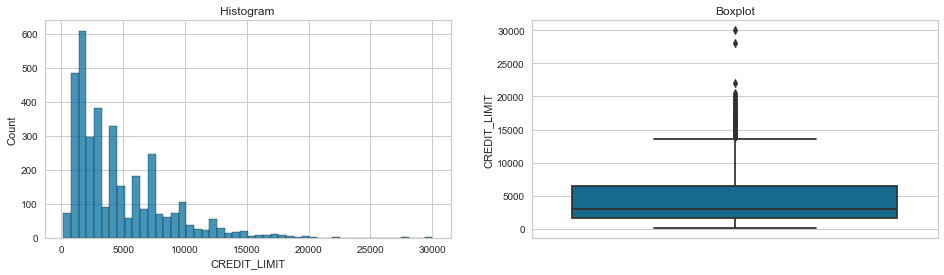


Nama variabel: CREDIT_LIMIT

Nilai Skewness:  1.496849446739514
Batas bawah CREDIT_LIMIT: 20900.0
Batas atas CREDIT_LIMIT: -12700.0

Outliers bawah CREDIT_LIMIT : 3577
Outliers atas CREDIT_LIMIT : 3580


In [27]:
diagnostic_plots(train, 'CREDIT_LIMIT')
print('\nNama variabel: CREDIT_LIMIT')
print('\nNilai Skewness: ', train['CREDIT_LIMIT'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'CREDIT_LIMIT', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah CREDIT_LIMIT:',skew_lower_bound)
print('Batas atas CREDIT_LIMIT:',skew_upper_bound)
print('')
print('Outliers bawah CREDIT_LIMIT : {}'.format(len(train[train['CREDIT_LIMIT'] < skew_lower_bound])))
print('Outliers atas CREDIT_LIMIT : {}'.format(len(train[train['CREDIT_LIMIT'] > skew_upper_bound])))

##### 3.1.4.2.13 PAYMENTS

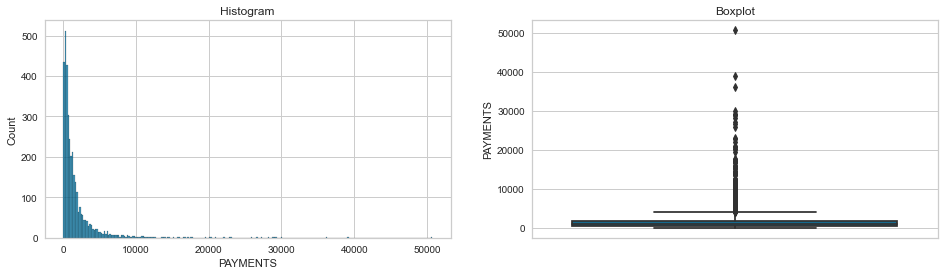


Nama variabel: PAYMENTS

Nilai Skewness:  5.917945916382864
Batas bawah PAYMENTS: 6444.8063425
Batas atas PAYMENTS: -4176.937307499999

Outliers bawah PAYMENTS : 3413
Outliers atas PAYMENTS : 3580


In [28]:
diagnostic_plots(train, 'PAYMENTS')
print('\nNama variabel: PAYMENTS')
print('\nNilai Skewness: ', train['PAYMENTS'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PAYMENTS', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PAYMENTS:',skew_lower_bound)
print('Batas atas PAYMENTS:',skew_upper_bound)
print('')
print('Outliers bawah PAYMENTS : {}'.format(len(train[train['PAYMENTS'] < skew_lower_bound])))
print('Outliers atas PAYMENTS : {}'.format(len(train[train['PAYMENTS'] > skew_upper_bound])))

##### 3.1.4.2.14 MINIMUM_PAYMENTS

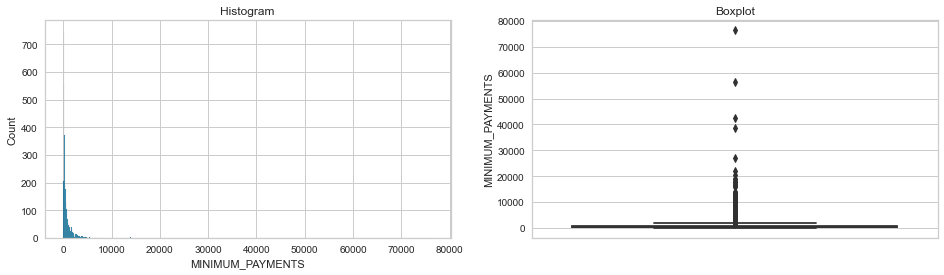


Nama variabel: MINIMUM_PAYMENTS

Nilai Skewness:  15.673730316750312
Batas bawah MINIMUM_PAYMENTS: 2668.1605987499997
Batas atas MINIMUM_PAYMENTS: -1701.52353825

Outliers bawah MINIMUM_PAYMENTS : 3382
Outliers atas MINIMUM_PAYMENTS : 3580


In [29]:
diagnostic_plots(train, 'MINIMUM_PAYMENTS')
print('\nNama variabel: MINIMUM_PAYMENTS')
print('\nNilai Skewness: ', train['MINIMUM_PAYMENTS'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'MINIMUM_PAYMENTS', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah MINIMUM_PAYMENTS:',skew_lower_bound)
print('Batas atas MINIMUM_PAYMENTS:',skew_upper_bound)
print('')
print('Outliers bawah MINIMUM_PAYMENTS : {}'.format(len(train[train['MINIMUM_PAYMENTS'] < skew_lower_bound])))
print('Outliers atas MINIMUM_PAYMENTS : {}'.format(len(train[train['MINIMUM_PAYMENTS'] > skew_upper_bound])))

##### 3.1.4.2.15 PRC_FULL_PAYMENT

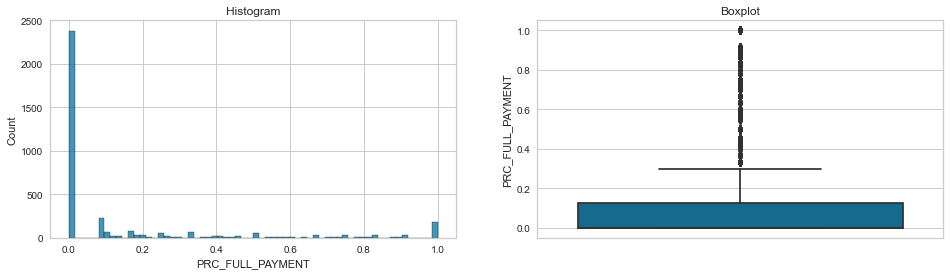


Nama variabel: PRC_FULL_PAYMENT

Nilai Skewness:  1.9942980275791222
Batas bawah PRC_FULL_PAYMENT: 0.5
Batas atas PRC_FULL_PAYMENT: -0.375

Outliers bawah PRC_FULL_PAYMENT : 3096
Outliers atas PRC_FULL_PAYMENT : 3580


In [30]:
diagnostic_plots(train, 'PRC_FULL_PAYMENT')
print('\nNama variabel: PRC_FULL_PAYMENT')
print('\nNilai Skewness: ', train['PRC_FULL_PAYMENT'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'PRC_FULL_PAYMENT', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah PRC_FULL_PAYMENT:',skew_lower_bound)
print('Batas atas PRC_FULL_PAYMENT:',skew_upper_bound)
print('')
print('Outliers bawah PRC_FULL_PAYMENT : {}'.format(len(train[train['PRC_FULL_PAYMENT'] < skew_lower_bound])))
print('Outliers atas PRC_FULL_PAYMENT : {}'.format(len(train[train['PRC_FULL_PAYMENT'] > skew_upper_bound])))

##### 3.1.4.2.16 TENURE

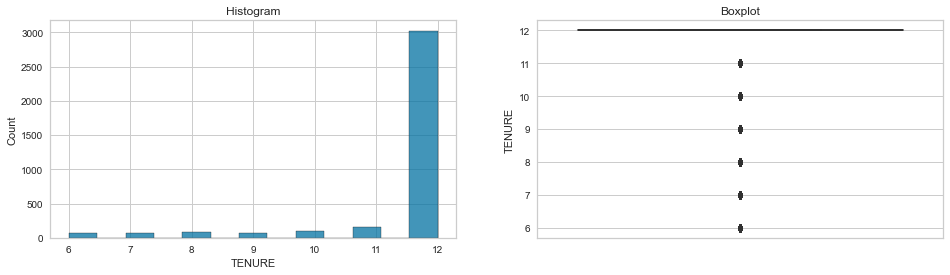


Nama variabel: TENURE

Nilai Skewness:  -2.949335738937894
Batas bawah TENURE: 12.0
Batas atas TENURE: 12.0

Outliers bawah TENURE : 557
Outliers atas TENURE : 0


In [31]:
diagnostic_plots(train, 'TENURE')
print('\nNama variabel: TENURE')
print('\nNilai Skewness: ', train['TENURE'].skew())

skew_lower_bound, skew_upper_bound = find_skewed_boundaries(train, 'TENURE', 3)
skew_lower_bound, skew_upper_bound

print('Batas bawah TENURE:',skew_lower_bound)
print('Batas atas TENURE:',skew_upper_bound)
print('')
print('Outliers bawah TENURE : {}'.format(len(train[train['TENURE'] < skew_lower_bound])))
print('Outliers atas TENURE : {}'.format(len(train[train['TENURE'] > skew_upper_bound])))

#### 3.1.4.3 Penanganan outlier dengan metode capping

Kolom PURCHASES_FREQUENCY dan PURCHASE_INSTALLMENTS_FREQUENCY tidak memiliki outliers. Sedangkan kolom TENURE akan memiliki 1 value saja jika diseragamkan. 3 kolom ini saya tidak lakukan capping.

In [32]:
capper_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, 

variables=['BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT'])


capper_normal.fit(train)
train_cln = capper_normal.transform(train)
test_cln = capper_normal.transform(test)

In [33]:
train_cln.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,3580.0,1583.153451,2094.985676,0.000000,124.506429,875.376066,2081.066948,18495.558550
BALANCE_FREQUENCY,3580.0,0.879938,0.230448,0.163428,0.888889,1.000000,1.000000,1.000000
PURCHASES,3580.0,917.600906,1451.026691,0.000000,38.912500,363.260000,1067.290000,7400.879855
ONEOFF_PURCHASES,3580.0,524.239302,1044.458691,0.000000,0.000000,45.000000,556.030000,5754.741326
INSTALLMENTS_PURCHASES,3580.0,374.728230,638.038687,0.000000,0.000000,88.590000,454.052500,3098.644388
CASH_ADVANCE,3580.0,921.190892,1646.749275,0.000000,0.000000,0.000000,1131.849681,7329.997247
PURCHASES_FREQUENCY,3580.0,0.490109,0.403512,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,3580.0,0.199041,0.295321,0.000000,0.000000,0.083333,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,3580.0,0.365613,0.399075,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,3580.0,0.133105,0.191708,0.000000,0.000000,0.000000,0.250000,0.743339


### 3.1.5 Feature Scaling

In [34]:
scaler = StandardScaler()
scaler.fit(train_cln)

train_scld = scaler.transform(train_cln)

train_scld

array([[-0.68879023, -2.24073769,  0.08610217, ..., -0.4060177 ,
         1.22631795,  0.36232552],
       [ 0.04153025, -0.66256355,  1.72548087, ...,  0.43108526,
        -0.08258001,  0.36232552],
       [ 0.20756974,  0.5210638 ,  0.15160288, ..., -0.07254596,
        -0.51887933,  0.36232552],
       ...,
       [-0.69869399,  0.5210638 ,  0.1038576 , ..., -0.51109728,
         2.97151524, -1.90537618],
       [ 0.1595879 ,  0.12652135,  4.46868735, ..., -0.34324189,
         0.97700256,  0.36232552],
       [ 0.22852144,  0.5210638 , -0.63246879, ..., -0.16371867,
         0.17919958,  0.36232552]])

In [35]:
train_scld_df = pd.DataFrame(train_scld)
train_scld_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.688790,-2.240738,0.086102,0.496289,-0.587395,-0.559478,-1.008228,-0.391859,-0.916280,-0.694408,-0.573560,-0.657288,0.436807,0.757849,-0.406018,1.226318,0.362326
1,0.041530,-0.662564,1.725481,2.773815,-0.587395,-0.559478,-0.595130,0.172578,-0.916280,-0.694408,-0.573560,0.868129,-0.511185,-0.221822,0.431085,-0.082580,0.362326
2,0.207570,0.521064,0.151603,0.587286,-0.587395,-0.470843,-0.388582,0.454795,-0.916280,0.175094,-0.195913,0.003726,-0.568639,0.376905,-0.072546,-0.518879,0.362326
3,-0.745572,0.521064,-0.529279,-0.501995,-0.352721,-0.559478,1.057262,-0.674075,1.381023,-0.694408,-0.573560,-0.148816,-0.855910,-0.710955,-0.495627,0.062854,0.362326
4,-0.755793,-3.109634,-0.616616,-0.501995,-0.551342,-0.559478,-1.008228,-0.674075,-0.707435,-0.694408,-0.573560,-0.657288,0.149537,-0.778866,-0.361924,-0.518879,0.362326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,-0.722684,0.521064,-0.193994,-0.501995,0.409784,-0.559478,0.850711,-0.674075,0.963330,-0.694408,-0.573560,0.105420,1.585889,-0.378118,-0.460533,0.644584,0.362326
3576,-0.750895,-3.029823,-0.549895,-0.387278,-0.587395,-0.559478,-1.008228,-0.391859,-0.916280,-0.694408,-0.573560,-0.606441,0.149537,-0.438542,-0.551002,-0.518879,0.362326
3577,-0.698694,0.521064,0.103858,-0.501995,1.087158,-0.559478,1.263810,-0.674075,1.311407,-0.694408,-0.573560,0.207115,-0.999545,-0.382725,-0.511097,2.971515,-1.905376
3578,0.159588,0.126521,4.468687,-0.429037,4.269799,-0.559478,-0.388582,-0.109638,-0.498588,-0.694408,-0.573560,-0.453899,3.022242,4.242593,-0.343242,0.977003,0.362326


### 3.1.6 Variance Inflation Factor (VIF)

In [36]:
vif_df = pd.DataFrame()
vif_df['feature'] = train_scld_df.columns

vif_df['VIF'] = [variance_inflation_factor(train_scld_df.values, i) for i in range(len(train_scld_df.columns))]

vif_df

,feature,VIF
0,0,3.275802
1,1,1.312741
2,2,45.427319
3,3,25.827541
4,4,12.458902
5,5,3.232406
6,6,11.569821
7,7,5.033756
8,8,11.541383
9,9,6.099574


Karena saya memilih threshold VIF adalah 5, sayapun memilih 8 fitur untuk menjadi acuan reduksi VIF ini menjadi 8 fitur.

### 3.1.7 Principal Component Analysis (PCA)

In [37]:
pca_scld=PCA(n_components=17).fit(train_scld)
pca_scld.explained_variance_ratio_

array([0.29642986, 0.22384331, 0.08729667, 0.07347028, 0.06125493,
       0.05545481, 0.04527986, 0.03705314, 0.03237794, 0.02500622,
       0.01703384, 0.01496986, 0.01169877, 0.01026887, 0.0054615 ,
       0.00236538, 0.00073478])

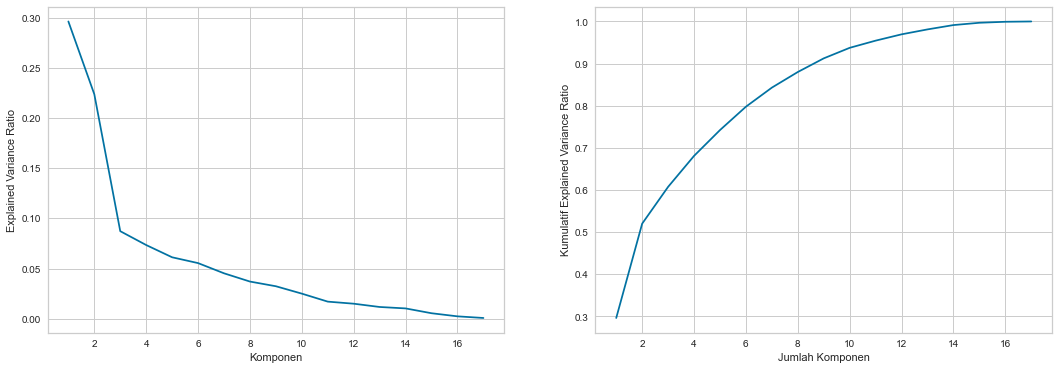

In [38]:
fig,ax=plt.subplots(ncols=2, figsize=(18, 6))

ax[0].plot(range(1,18), pca_scld.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].grid

ax[1].plot(range(1,18), np.cumsum(pca_scld.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Variance Ratio')
ax[1].grid

plt.show()

Karena dari perhitngan EVR terdapat 90%. Maka saya kurangi 1 ftur lagi menjadi 7 fitur.

In [39]:
pca = PCA(n_components=7)
train_pca = pca.fit_transform(train_scld)

## 3.2 Clustering

### 3.2.1 K-MEANS

#### 3.2.1.1 Mencari titik optimum

##### 3.2.1.1.1 Elbow Method

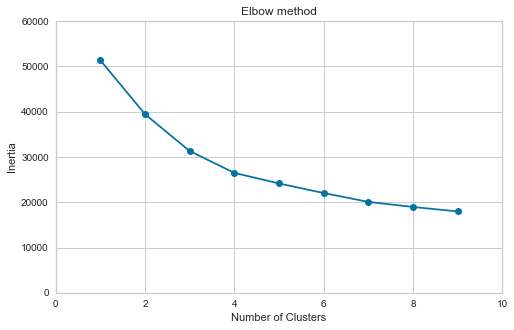

In [40]:
kmeans_models = [KMeans(n_clusters=k, max_iter=500, random_state=114).fit(train_pca) for k in range (1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, 'bo-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.axis([0, 10, 0, 60000]);

Dari metode ini, terlihat bahwa perubahan arah horizontal menjadi vertikal terlihat pada titik 3. Namun saya coba lihat hasil Silhouette.

##### 3.2.1.1.2 Silhouette Score

In [41]:
silhouette_scores = [silhouette_score(train_pca, model.labels_)
                     for model in kmeans_models[1:]]

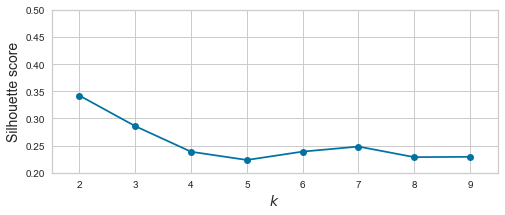

In [42]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.5, 9.5, 0.2, 0.5])
plt.show()

Hasil juga menunjukan hasil yang sama, yaitu pada angka 3.

##### 3.2.1.1.3 Silhouette Diagram

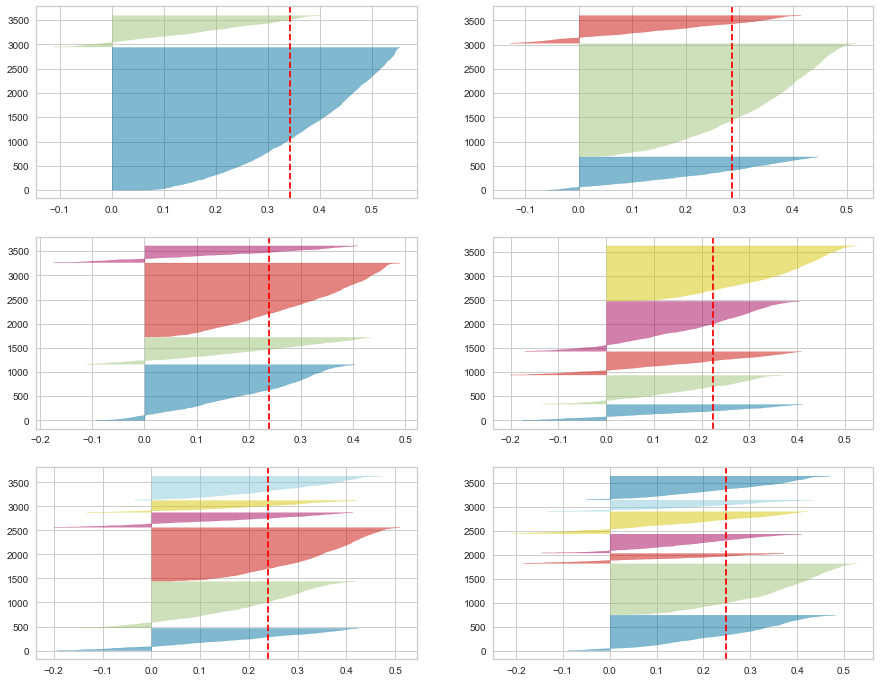

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(15,12))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, random_state=114)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(train_pca)

Pada cluster 3, tidak ada cluster yang terlalu sedikit dan tidak ada cluster yang terlalu besar. Sehingga saya memilih 3 cluster.

##### 3.2.1.1.4 K-Means Clustering

In [44]:
kmeans = KMeans(n_clusters=3, max_iter=500, random_state=114)
kmeans.fit(train_pca)

KMeans(max_iter=500, n_clusters=3, random_state=114)

In [45]:
kmeans.labels_

array([1, 1, 1, ..., 1, 2, 0])

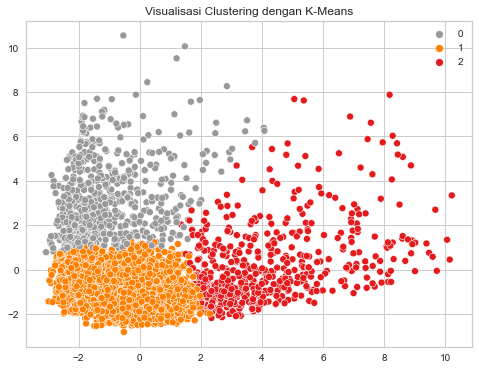

In [46]:
plt.figure(figsize=(8, 6))
ax_kmeans = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=kmeans.labels_, palette='Set1_r')
ax_kmeans.set_title('Visualisasi Clustering dengan K-Means');

### 3.2.2 AGGLOMERATIVE CLUSTERING

#### 3.2.2.1 Linkage: 'ward'

In [47]:
agg_wrd = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_wrd.fit(train_pca)

AgglomerativeClustering(n_clusters=3)

In [48]:
agg_wrd.labels_

array([0, 1, 0, ..., 0, 1, 2], dtype=int64)

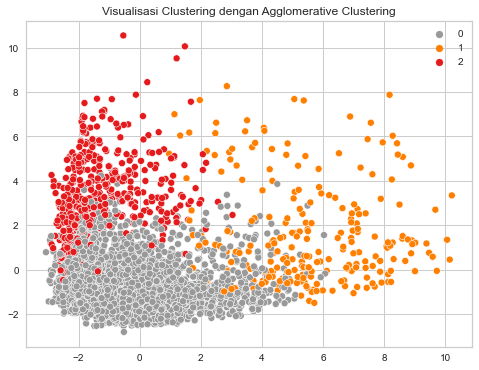

In [49]:
plt.figure(figsize=(8, 6))
ax_agg_wrd = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg_wrd.labels_, palette='Set1_r')
ax_agg_wrd.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

#### 3.2.2.2 linkage: 'average'

In [50]:
agg_avg = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_avg.fit(train_pca)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [51]:
agg_avg.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

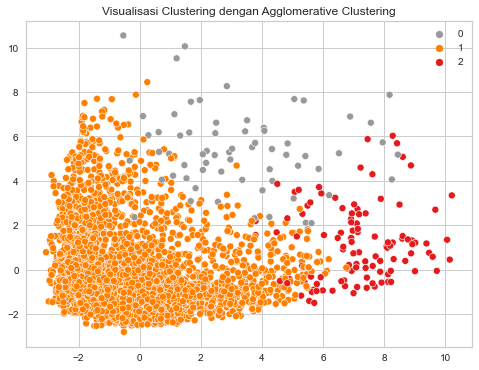

In [52]:
plt.figure(figsize=(8, 6))
ax_agg_avg = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg_avg.labels_, palette='Set1_r')
ax_agg_avg.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

#### 3.2.2.3 linkage: 'complete'

In [53]:
agg_cmplt = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg_cmplt.fit(train_pca)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [54]:
agg_cmplt.labels_

array([2, 2, 2, ..., 2, 0, 1], dtype=int64)

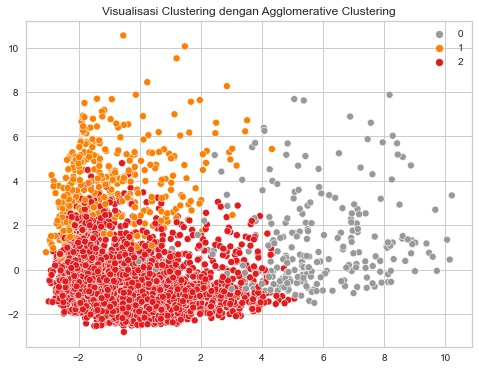

In [55]:
plt.figure(figsize=(8, 6))
ax_agg_cmplt = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg_cmplt.labels_, palette='Set1_r')
ax_agg_cmplt.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

#### 3.2.2.4 linkage: single

In [56]:
agg_sngl = AgglomerativeClustering(n_clusters=3, linkage='single')
agg_sngl.fit(train_pca)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [57]:
agg_sngl.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

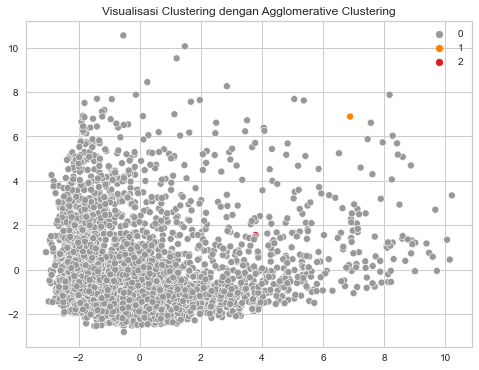

In [58]:
plt.figure(figsize=(8, 6))
ax_agg_sngl = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=agg_sngl.labels_, palette='Set1_r')
ax_agg_sngl.set_title('Visualisasi Clustering dengan Agglomerative Clustering');

### 3.2.3 SPECTRAL CLUSTERING

#### 3.2.3.1 affinity: nearest_neighbors

In [59]:
scl_nn = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
scl_nn.fit(train_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [60]:
scl_nn.labels_

array([0, 2, 0, ..., 2, 2, 1])

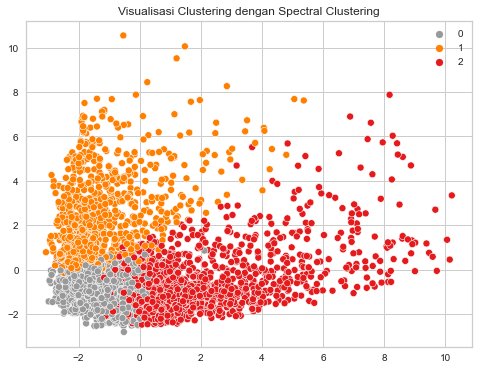

In [61]:
plt.figure(figsize=(8, 6))
ax_scl_nn = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=scl_nn.labels_, palette='Set1_r')
ax_scl_nn.set_title('Visualisasi Clustering dengan Spectral Clustering');

#### 3.2.3.2 affinity: rbf

In [62]:
scl_rbf = SpectralClustering(n_clusters=3, affinity='rbf')
scl_rbf.fit(train_pca)

SpectralClustering(n_clusters=3)

In [63]:
scl_rbf.labels_

array([0, 0, 0, ..., 0, 0, 0])

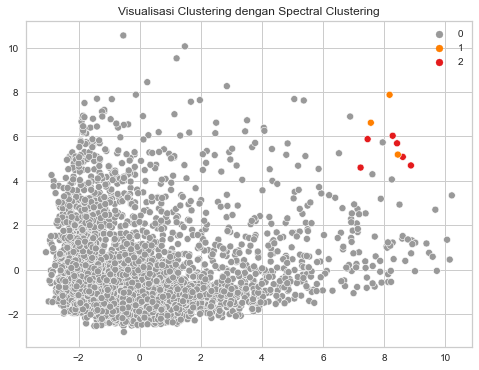

In [64]:
plt.figure(figsize=(8, 6))
ax_scl_rbf = sns.scatterplot(x=train_pca[:,0], y=train_pca[:,1], hue=scl_rbf.labels_, palette='Set1_r')
ax_scl_rbf.set_title('Visualisasi Clustering dengan Spectral Clustering');

## 3.3 Data Inference

Saya mengambil hasil terbaik dari 3 clustering untuk dipakai mengolah data inferensial, yaitu K-Means, Agglomerative Clustering dengan Linkage Ward, dan Spectral Clustering dengan Affinity Nearest Neighbors.

### 3.3.1 Persiapan

In [65]:
test_cln = capper_normal.transform(test)

In [66]:
test_scld = scaler.transform(test_cln)

test_scld

array([[ 0.04454284,  0.5210638 , -0.63246879, ...,  0.27191031,
        -0.51887933,  0.36232552],
       [-0.23568023,  0.5210638 , -0.63246879, ..., -0.42932099,
        -0.51887933,  0.36232552],
       [-0.74658071,  0.5210638 , -0.48772346, ..., -0.48864382,
         1.22631795,  0.36232552],
       ...,
       [-0.60565343, -0.66256355,  0.40367342, ..., -0.47365683,
        -0.51887933,  0.36232552],
       [ 0.56792057,  0.5210638 , -0.63246879, ...,  0.19093219,
        -0.51887933,  0.36232552],
       [-0.3433269 , -1.4078104 , -0.52163522, ..., -0.24087305,
        -0.51887933, -1.90537618]])

In [67]:
test_pca = pca.transform(test_scld)

### 3.3.1 K-MEANS

In [68]:
kmeans_test = KMeans(n_clusters=3, max_iter=500, random_state=114)
kmeans_test.fit(test_pca)

KMeans(max_iter=500, n_clusters=3, random_state=114)

In [69]:
kmeans_test.labels_

array([1, 1, 1, 2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1,

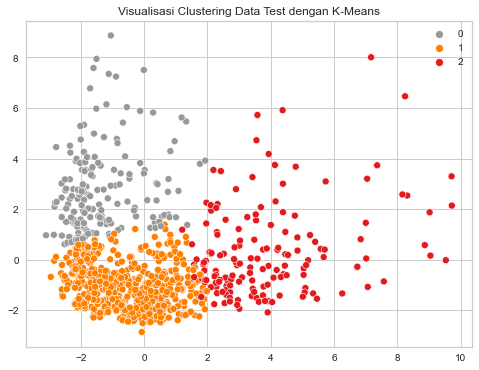

In [70]:
plt.figure(figsize=(8, 6))
ax_kmeans_test = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=kmeans_test.labels_, palette='Set1_r')
ax_kmeans_test.set_title('Visualisasi Clustering Data Test dengan K-Means');

### 3.3.2 AGGLOMERATIVE CLUSTERING with Linkage: ward

In [71]:
agg_wrd_test = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_wrd_test.fit(test_pca)

AgglomerativeClustering(n_clusters=3)

In [72]:
agg_wrd_test.labels_

array([1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2,
       2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0,
       0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0,
       0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1,

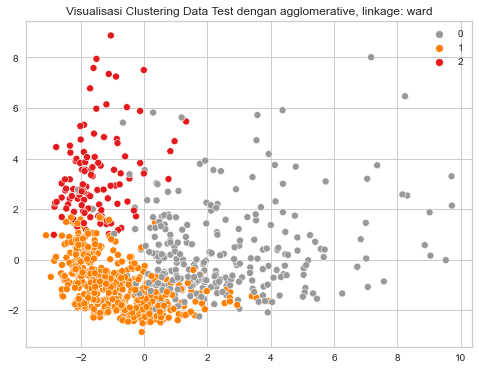

In [73]:
plt.figure(figsize=(8, 6))
ax_agg_wrd_test = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=agg_wrd_test.labels_, palette='Set1_r')
ax_agg_wrd_test.set_title('Visualisasi Clustering Data Test dengan agglomerative, linkage: ward');

### 3.3.3 SPECTRAL CLUSTERING with affinity: nearest_neighbors

In [74]:
scl_nn_test = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')
scl_nn_test.fit(test_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

In [75]:
scl_nn_test.labels_

array([1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1,
       1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1,
       0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 2,
       1, 1, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2,

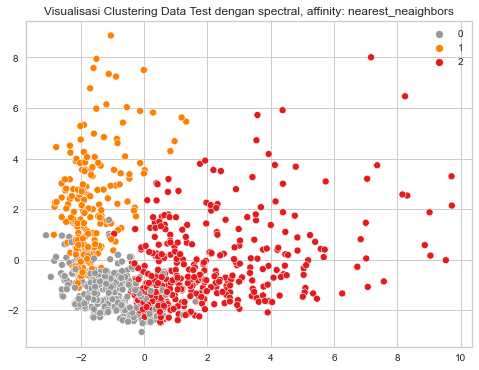

In [76]:
plt.figure(figsize=(8, 6))
ax_agg_wrd_test = sns.scatterplot(x=test_pca[:,0], y=test_pca[:,1], hue=scl_nn_test.labels_, palette='Set1_r')
ax_agg_wrd_test.set_title('Visualisasi Clustering Data Test dengan spectral, affinity: nearest_neaighbors');

### 3.3.4 Kesimpulan clustering

Karena hasil clustering yang terlihat lebih baik dalam pemisahan clusternya adalah clustering K-Means. Maka saya memakai cluster K-Means untuk dilanjutkan ke tahap Explorative Data Analysis.

## 3.4 Eksploratory Data Analysis

### 3.4.1 Mempersiapkan

In [77]:
train['cluster_id'] = kmeans.labels_
test['cluster_id'] = kmeans_test.labels_

In [78]:
df_eda = pd.concat([train, test], axis=0, ignore_index=True)
df_eda

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,140.349336,0.363636,1042.52,1042.52,0.00,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,6000.0,3212.647061,260.066741,0.500000,12,1
1,1670.146578,0.727273,3420.97,3420.97,0.00,0.00000,0.250000,0.250000,0.000000,0.000000,0,31,2700.0,1164.552612,1283.600242,0.125000,12,1
2,2017.948347,1.000000,1137.55,1137.55,0.00,145.93864,0.333333,0.333333,0.000000,0.166667,2,14,2500.0,2416.247973,667.805708,0.000000,12,1
3,21.409828,1.000000,149.71,0.00,149.71,0.00000,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,141.974905,150.500248,0.166667,12,1
4,0.000000,0.000000,23.00,0.00,23.00,0.00000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,313.980229,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,233.395491,0.818182,2025.00,2025.00,0.00,385.62779,0.750000,0.750000,0.000000,0.083333,1,21,6000.0,2420.445403,118.312302,0.500000,12,2
4471,635.358243,0.400000,250.00,250.00,0.00,0.00000,0.100000,0.100000,0.000000,0.000000,0,1,8000.0,4995.053024,284.706930,0.000000,10,1
4472,314.495423,0.727273,1503.26,1192.26,311.00,0.00000,0.583333,0.166667,0.416667,0.000000,0,8,4000.0,1230.180271,177.363751,0.000000,12,1
4473,2772.772734,1.000000,0.00,0.00,0.00,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12,1


### 3.4.2 Mendiskripsikan isi data

In [79]:
df_eda.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,854.580229,0.150224,11.518212,0.969609
std,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2396.482085,0.289081,1.328925,0.594241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,170.457570,0.000000,12.000000,1.000000
50%,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000,1.000000
75%,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,785.953474,0.125000,12.000000,1.000000
max,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,2.000000


#### 3.4.3 Segmentasi dengan melihat clustering

#### 3.4.3.1 Persiapan

In [80]:
cluster_1 = df_eda[df_eda['cluster_id'] == 0]
cluster_2 = df_eda[df_eda['cluster_id'] == 1]
cluster_3 = df_eda[df_eda['cluster_id'] == 2]

#### 3.4.3.2 Melihat dengan cara per cluster

##### 3.4.3.2.1 Cluster 1

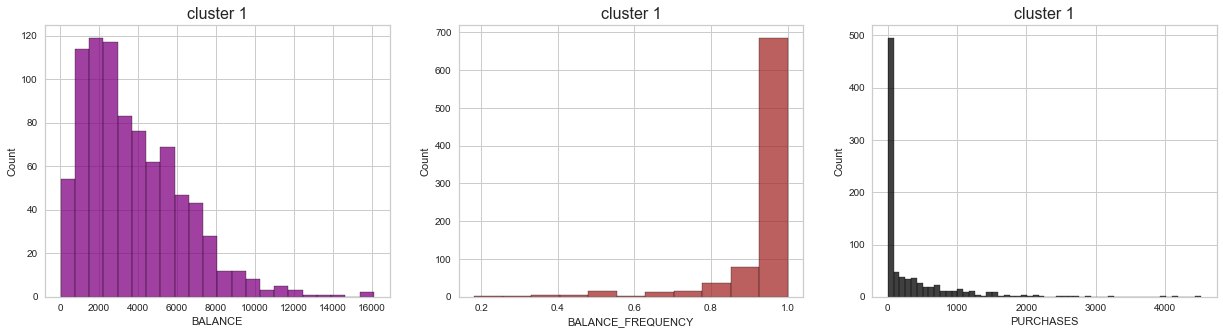

In [81]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['BALANCE'], color = 'purple')
plt.title('cluster 1', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['BALANCE_FREQUENCY'], color='brown' )
plt.title('cluster 1', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_1['PURCHASES'], color='black')
plt.title('cluster 1', size = 16);

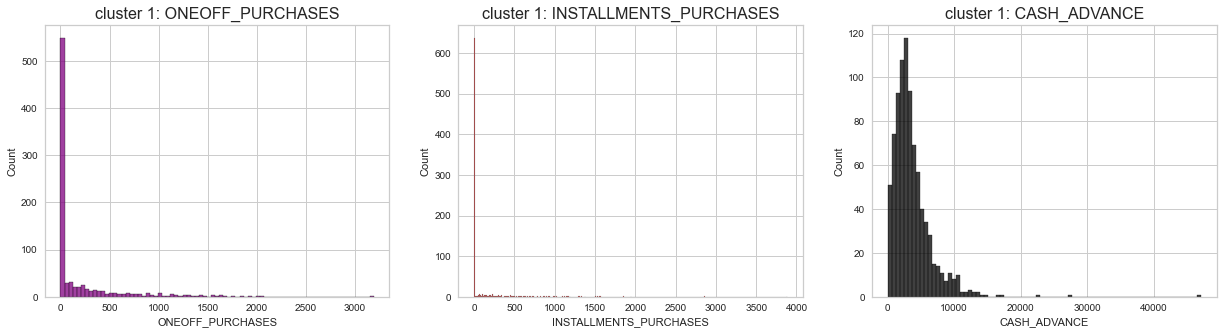

In [82]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['ONEOFF_PURCHASES'], color = 'purple')
plt.title('cluster 1: ONEOFF_PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['INSTALLMENTS_PURCHASES'], color='brown' )
plt.title('cluster 1: INSTALLMENTS_PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_1['CASH_ADVANCE'], color='black')
plt.title('cluster 1: CASH_ADVANCE', size = 16);

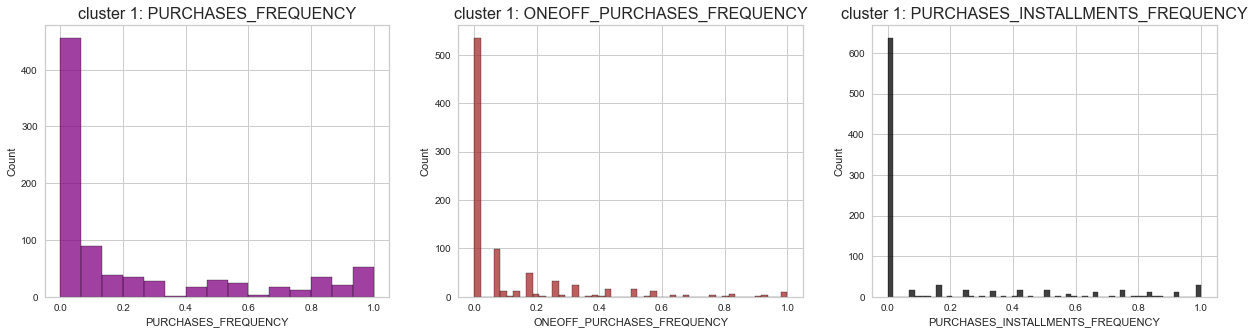

In [83]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PURCHASES_FREQUENCY'], color = 'purple')
plt.title('cluster 1: PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['ONEOFF_PURCHASES_FREQUENCY'], color='brown' )
plt.title('cluster 1: ONEOFF_PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_1['PURCHASES_INSTALLMENTS_FREQUENCY'], color='black')
plt.title('cluster 1: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16);

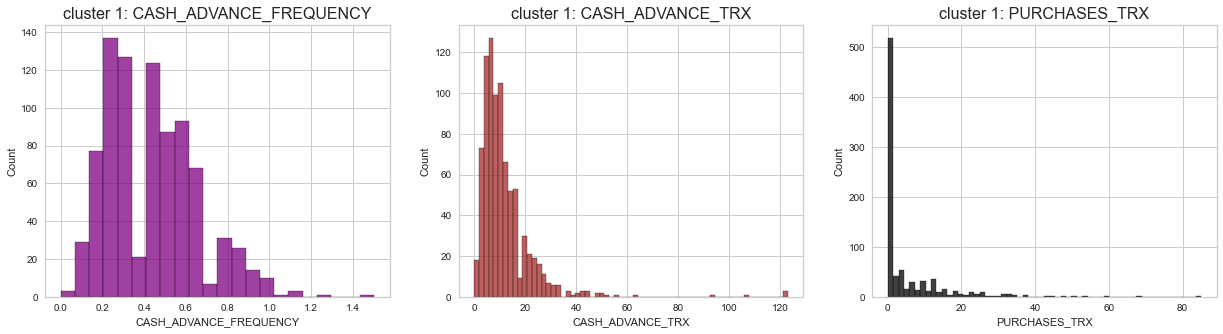

In [84]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CASH_ADVANCE_FREQUENCY'], color = 'purple')
plt.title('cluster 1: CASH_ADVANCE_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['CASH_ADVANCE_TRX'], color='brown' )
plt.title('cluster 1: CASH_ADVANCE_TRX', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_1['PURCHASES_TRX'], color='black')
plt.title('cluster 1: PURCHASES_TRX', size = 16);

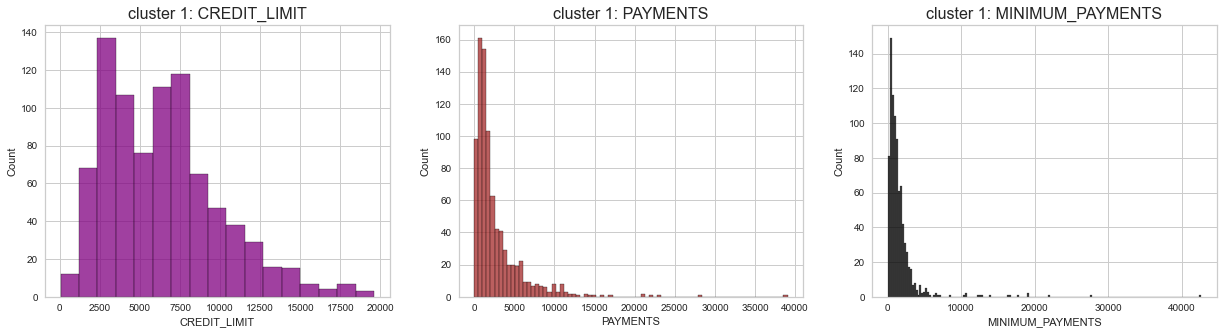

In [85]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CREDIT_LIMIT'], color = 'purple')
plt.title('cluster 1: CREDIT_LIMIT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['PAYMENTS'], color='brown' )
plt.title('cluster 1: PAYMENTS', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_1['MINIMUM_PAYMENTS'], color='black')
plt.title('cluster 1: MINIMUM_PAYMENTS', size = 16);

Text(0.5, 1.0, 'cluster 1: TENURE')

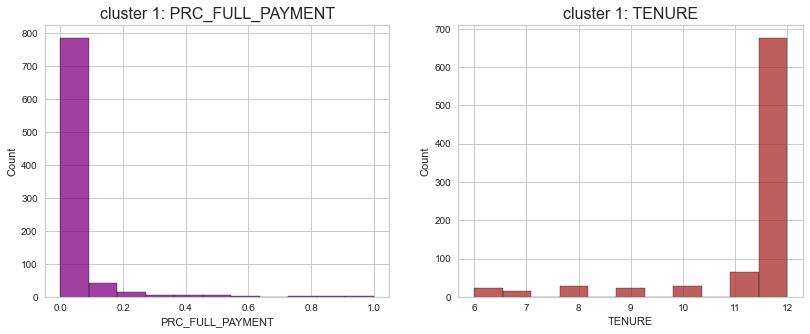

In [86]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PRC_FULL_PAYMENT'], color = 'purple')
plt.title('cluster 1: PRC_FULL_PAYMENT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_1['TENURE'], color='brown' )
plt.title('cluster 1: TENURE', size = 16)

##### 3.4.3.2.2 Cluster 2

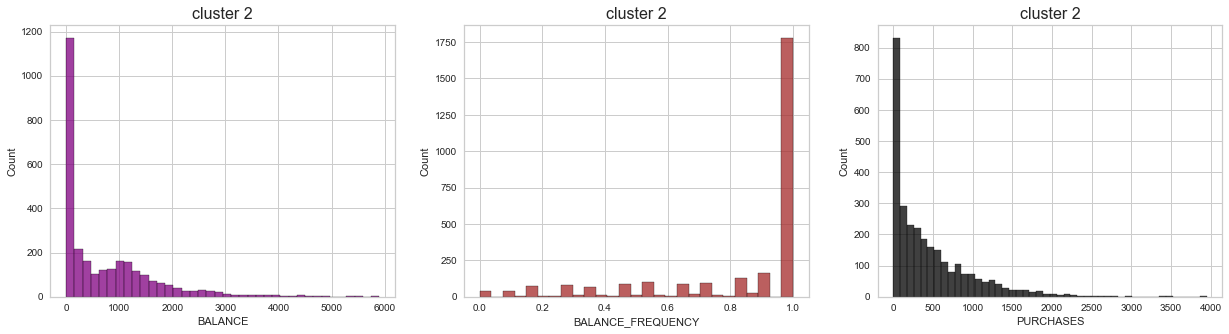

In [87]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['BALANCE'], color = 'purple')
plt.title('cluster 2', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['BALANCE_FREQUENCY'], color='brown' )
plt.title('cluster 2', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_2['PURCHASES'], color='black')
plt.title('cluster 2', size = 16);

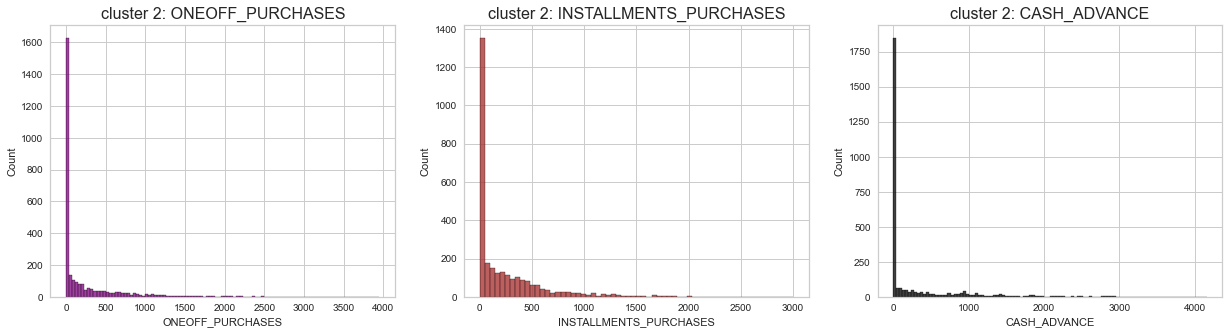

In [88]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['ONEOFF_PURCHASES'], color = 'purple')
plt.title('cluster 2: ONEOFF_PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['INSTALLMENTS_PURCHASES'], color='brown' )
plt.title('cluster 2: INSTALLMENTS_PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_2['CASH_ADVANCE'], color='black')
plt.title('cluster 2: CASH_ADVANCE', size = 16);

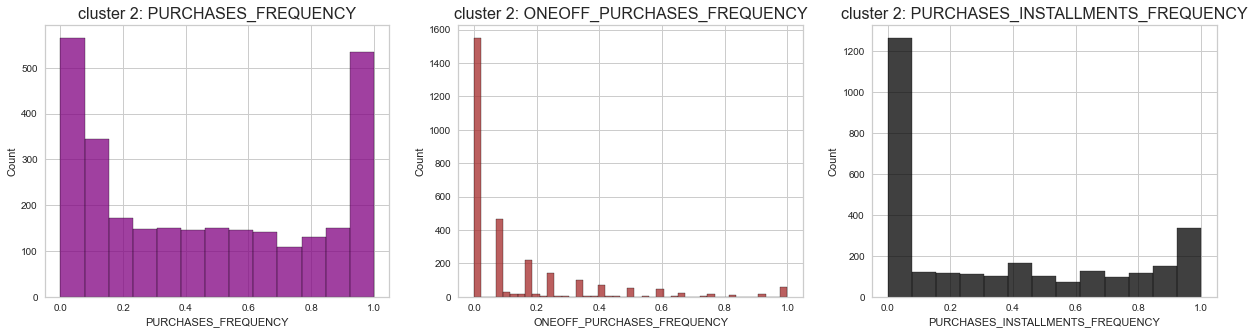

In [89]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['PURCHASES_FREQUENCY'], color = 'purple')
plt.title('cluster 2: PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['ONEOFF_PURCHASES_FREQUENCY'], color='brown' )
plt.title('cluster 2: ONEOFF_PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_2['PURCHASES_INSTALLMENTS_FREQUENCY'], color='black')
plt.title('cluster 2: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16);

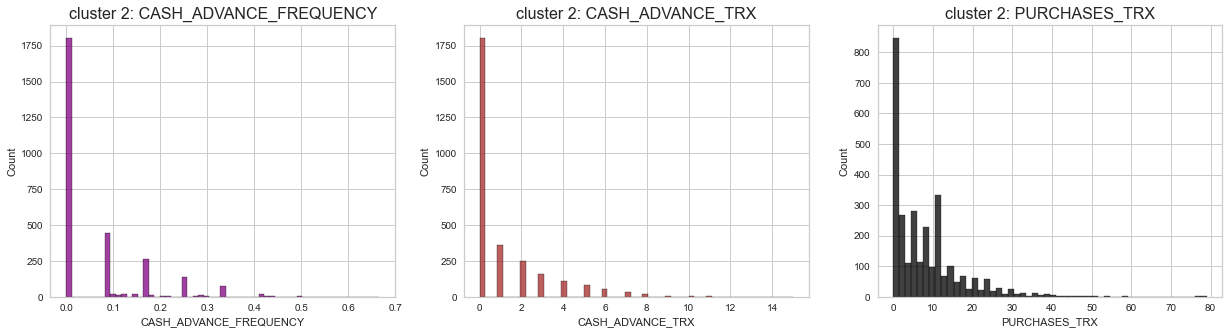

In [90]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['CASH_ADVANCE_FREQUENCY'], color = 'purple')
plt.title('cluster 2: CASH_ADVANCE_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['CASH_ADVANCE_TRX'], color='brown' )
plt.title('cluster 2: CASH_ADVANCE_TRX', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_2['PURCHASES_TRX'], color='black')
plt.title('cluster 2: PURCHASES_TRX', size = 16);

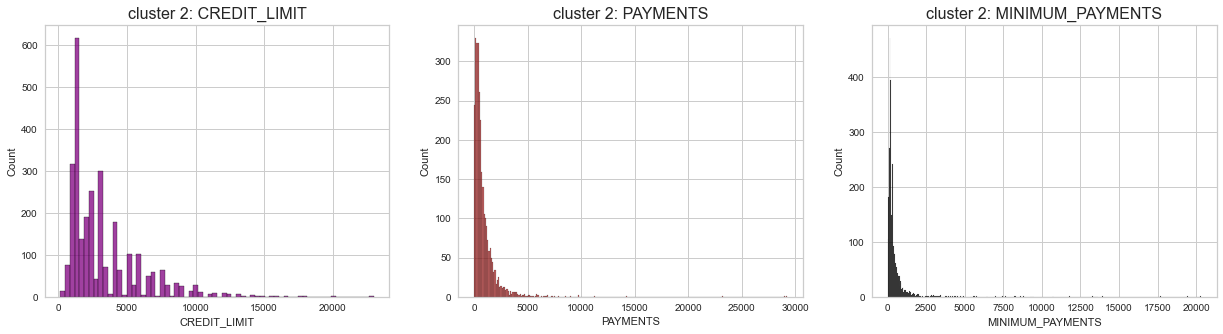

In [91]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['CREDIT_LIMIT'], color = 'purple')
plt.title('cluster 2: CREDIT_LIMIT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PAYMENTS'], color='brown' )
plt.title('cluster 2: PAYMENTS', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_2['MINIMUM_PAYMENTS'], color='black')
plt.title('cluster 2: MINIMUM_PAYMENTS', size = 16);

Text(0.5, 1.0, 'cluster 2: TENURE')

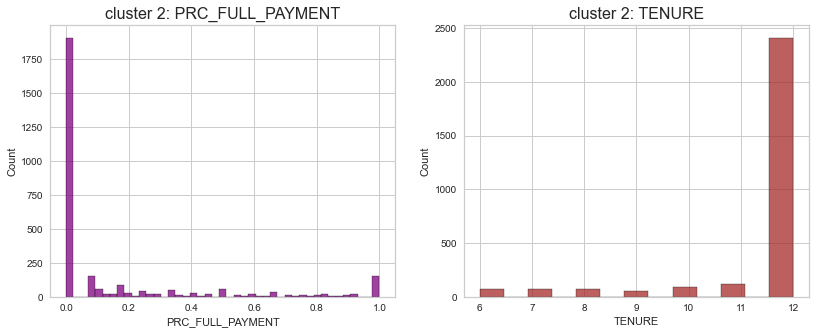

In [92]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_2['PRC_FULL_PAYMENT'], color = 'purple')
plt.title('cluster 2: PRC_FULL_PAYMENT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['TENURE'], color='brown' )
plt.title('cluster 2: TENURE', size = 16)

##### 3.4.3.2.4 Cluster 3

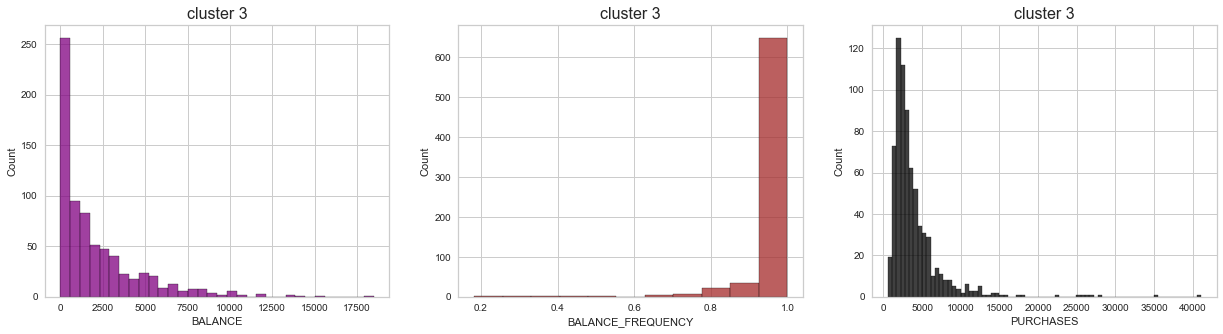

In [93]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['BALANCE'], color = 'purple')
plt.title('cluster 3', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['BALANCE_FREQUENCY'], color='brown' )
plt.title('cluster 3', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES'], color='black')
plt.title('cluster 3', size = 16);

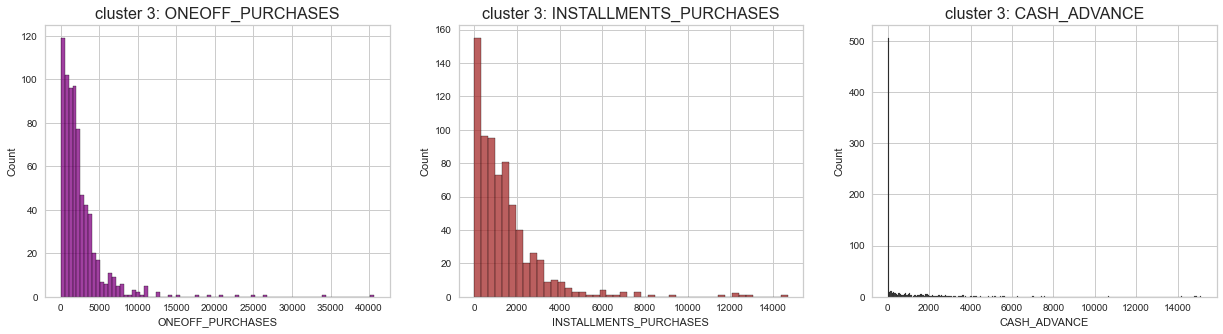

In [94]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['ONEOFF_PURCHASES'], color = 'purple')
plt.title('cluster 3: ONEOFF_PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['INSTALLMENTS_PURCHASES'], color='brown' )
plt.title('cluster 3: INSTALLMENTS_PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['CASH_ADVANCE'], color='black')
plt.title('cluster 3: CASH_ADVANCE', size = 16);

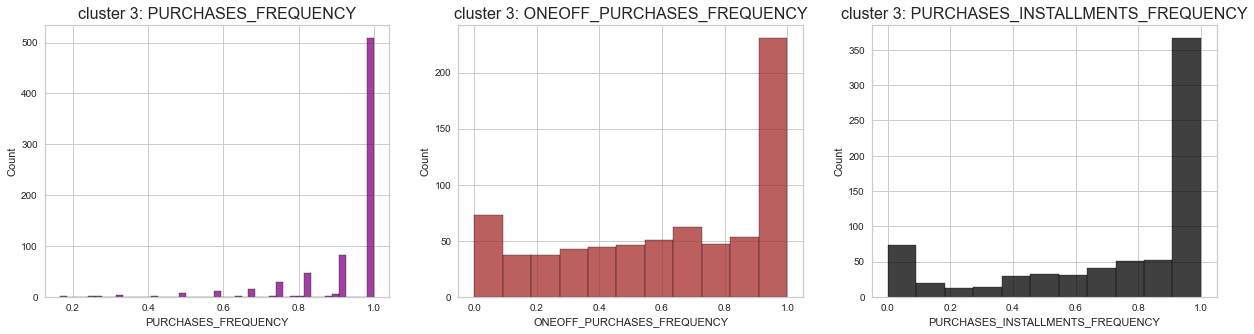

In [95]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['PURCHASES_FREQUENCY'], color = 'purple')
plt.title('cluster 3: PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['ONEOFF_PURCHASES_FREQUENCY'], color='brown' )
plt.title('cluster 3: ONEOFF_PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES_INSTALLMENTS_FREQUENCY'], color='black')
plt.title('cluster 3: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16);

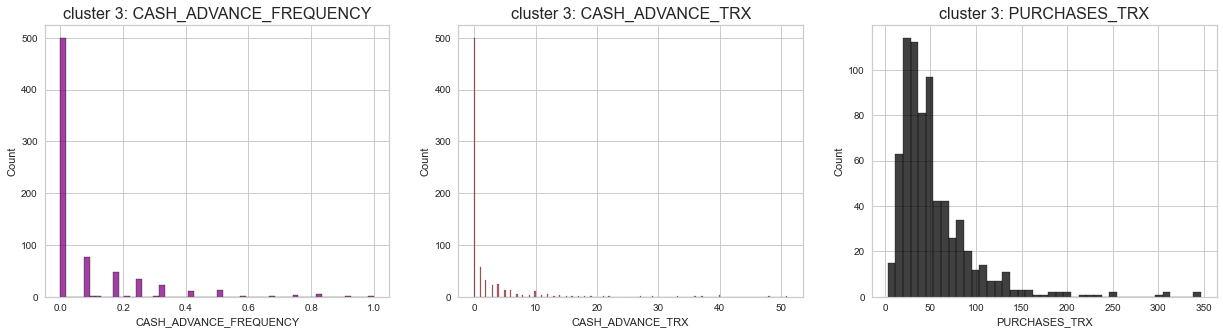

In [96]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['CASH_ADVANCE_FREQUENCY'], color = 'purple')
plt.title('cluster 3: CASH_ADVANCE_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['CASH_ADVANCE_TRX'], color='brown' )
plt.title('cluster 3: CASH_ADVANCE_TRX', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES_TRX'], color='black')
plt.title('cluster 3: PURCHASES_TRX', size = 16);

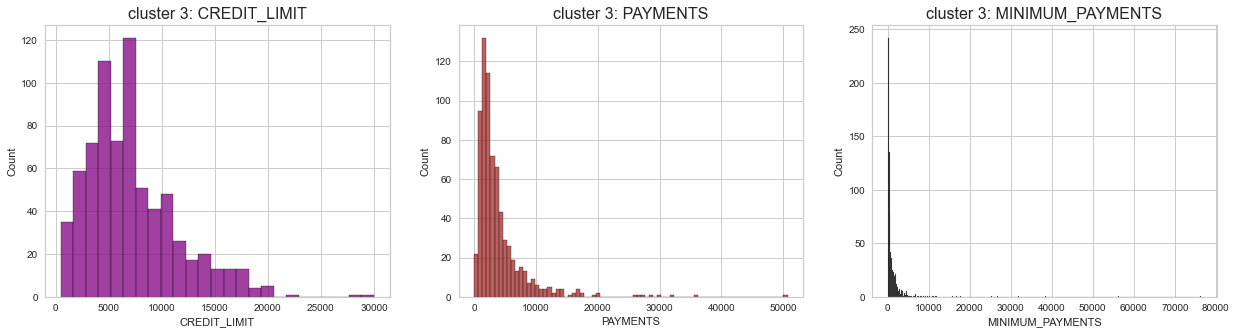

In [97]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['CREDIT_LIMIT'], color = 'purple')
plt.title('cluster 3: CREDIT_LIMIT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['PAYMENTS'], color='brown' )
plt.title('cluster 3: PAYMENTS', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['MINIMUM_PAYMENTS'], color='black')
plt.title('cluster 3: MINIMUM_PAYMENTS', size = 16);

Text(0.5, 1.0, 'cluster 3: TENURE')

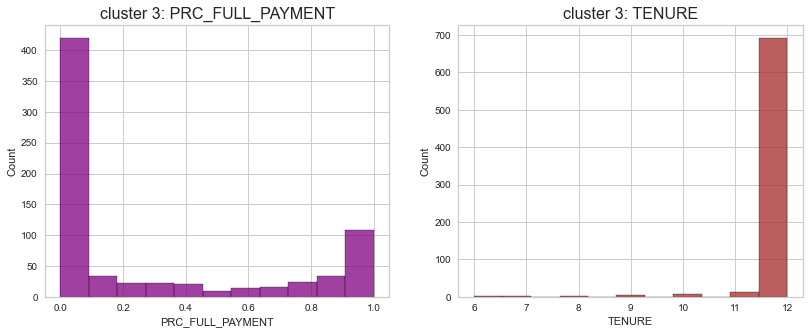

In [98]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_3['PRC_FULL_PAYMENT'], color = 'purple')
plt.title('cluster 3: PRC_FULL_PAYMENT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_3['TENURE'], color='brown' )
plt.title('cluster 3: TENURE', size = 16)

#### 3.4.3.3 Melihat dengan cara per fitur

In [99]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

##### 3.4.3.3.1 BALANCE

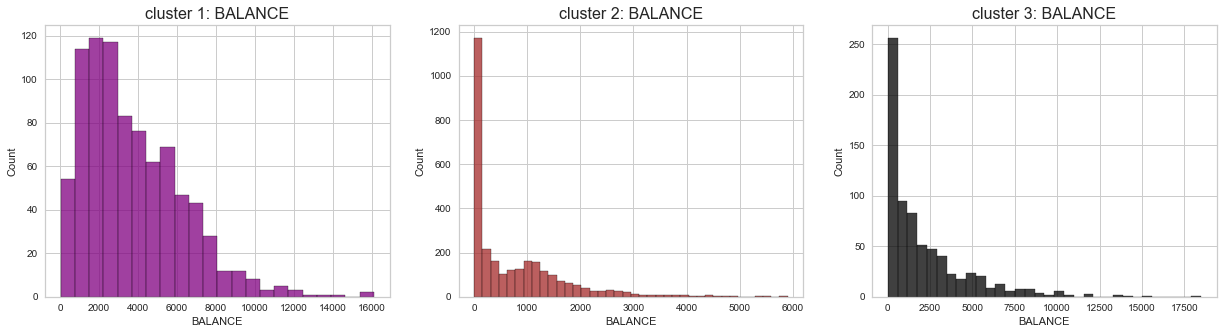

In [100]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['BALANCE'], color = 'purple')
plt.title('cluster 1: BALANCE', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['BALANCE'], color='brown' )
plt.title('cluster 2: BALANCE', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['BALANCE'], color='black')
plt.title('cluster 3: BALANCE', size = 16);

##### 3.4.3.3.2 BALANCE_FREQUENCY

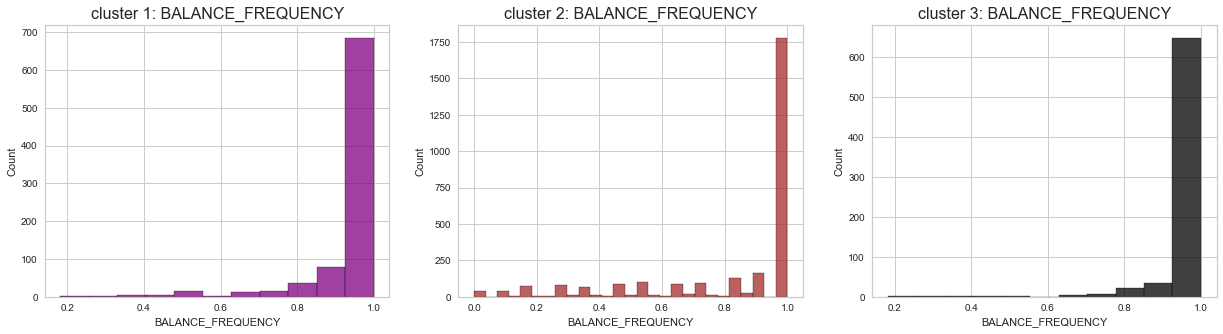

In [101]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['BALANCE_FREQUENCY'], color = 'purple')
plt.title('cluster 1: BALANCE_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['BALANCE_FREQUENCY'], color='brown' )
plt.title('cluster 2: BALANCE_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['BALANCE_FREQUENCY'], color='black')
plt.title('cluster 3: BALANCE_FREQUENCY', size = 16);

##### 3.4.3.3.3 PURCHASES

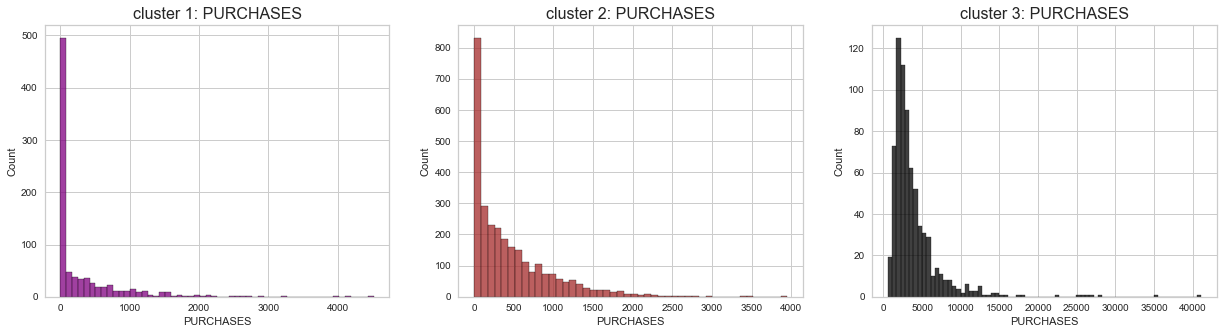

In [102]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PURCHASES'], color = 'purple')
plt.title('cluster 1: PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PURCHASES'], color='brown' )
plt.title('cluster 2: PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES'], color='black')
plt.title('cluster 3: PURCHASES', size = 16);

##### 3.4.3.3.4 ONEOFF_PURCHASES

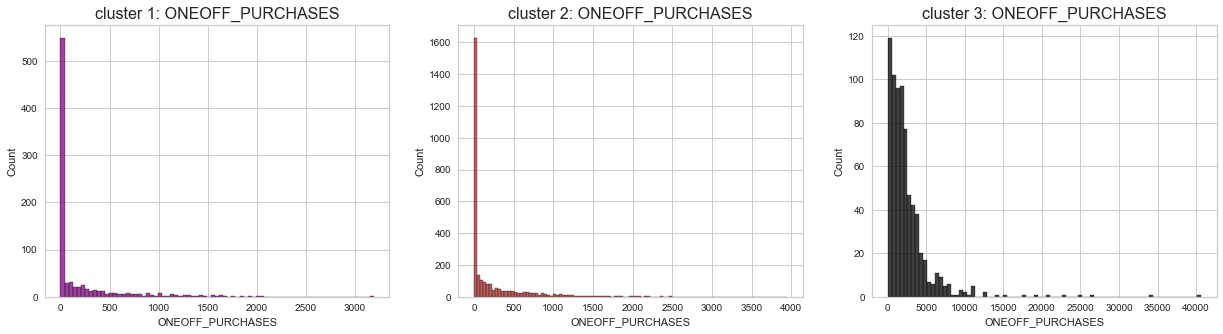

In [103]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['ONEOFF_PURCHASES'], color = 'purple')
plt.title('cluster 1: ONEOFF_PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['ONEOFF_PURCHASES'], color='brown' )
plt.title('cluster 2: ONEOFF_PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['ONEOFF_PURCHASES'], color='black')
plt.title('cluster 3: ONEOFF_PURCHASES', size = 16);

##### 3.4.3.3.5 INSTALLMENTS_PURCHASES

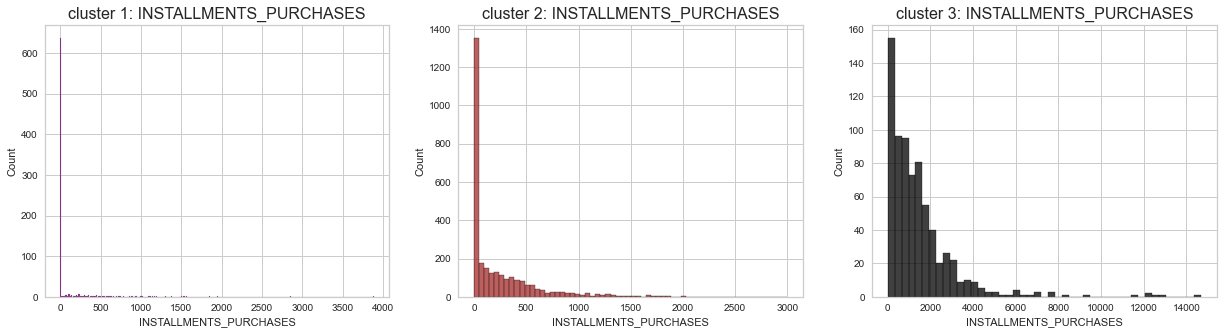

In [104]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['INSTALLMENTS_PURCHASES'], color = 'purple')
plt.title('cluster 1: INSTALLMENTS_PURCHASES', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['INSTALLMENTS_PURCHASES'], color='brown' )
plt.title('cluster 2: INSTALLMENTS_PURCHASES', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['INSTALLMENTS_PURCHASES'], color='black')
plt.title('cluster 3: INSTALLMENTS_PURCHASES', size = 16);

##### 3.4.3.3.6 CASH_ADVANCE

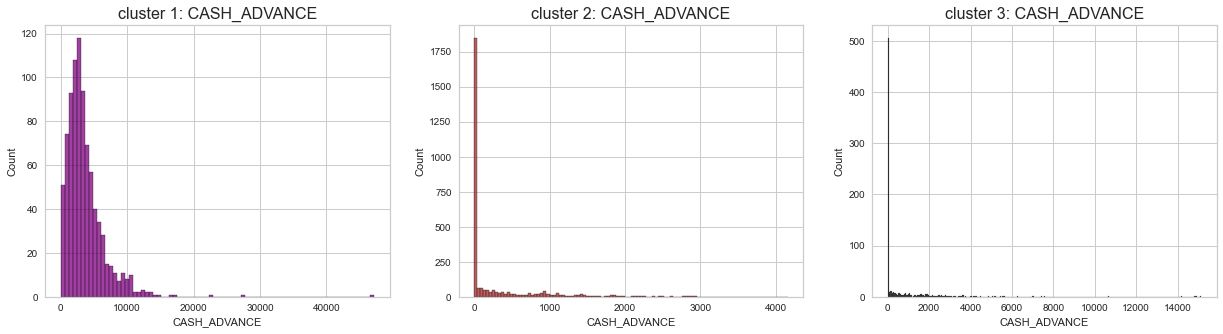

In [105]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CASH_ADVANCE'], color = 'purple')
plt.title('cluster 1: CASH_ADVANCE', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['CASH_ADVANCE'], color='brown' )
plt.title('cluster 2: CASH_ADVANCE', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['CASH_ADVANCE'], color='black')
plt.title('cluster 3: CASH_ADVANCE', size = 16);

##### 3.4.3.3.7 PURCHASES_FREQUENCY

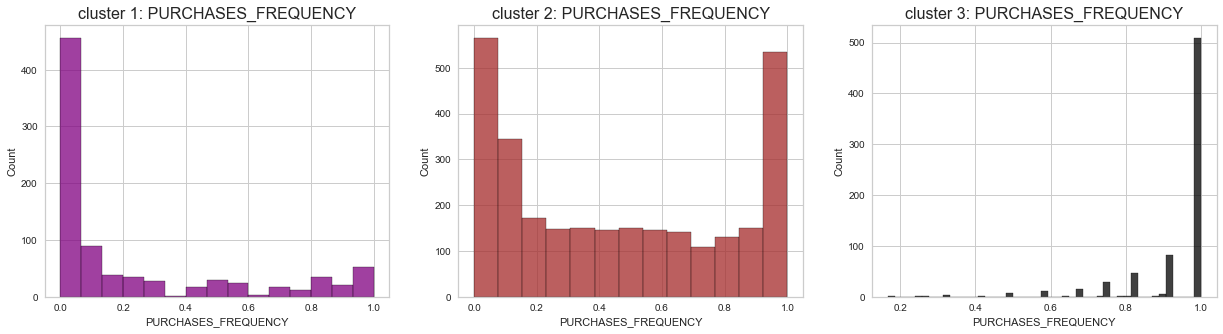

In [106]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PURCHASES_FREQUENCY'], color = 'purple')
plt.title('cluster 1: PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PURCHASES_FREQUENCY'], color='brown' )
plt.title('cluster 2: PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES_FREQUENCY'], color='black')
plt.title('cluster 3: PURCHASES_FREQUENCY', size = 16);

##### 3.4.3.3.8 ONEOFF_PURCHASES_FREQUENCY

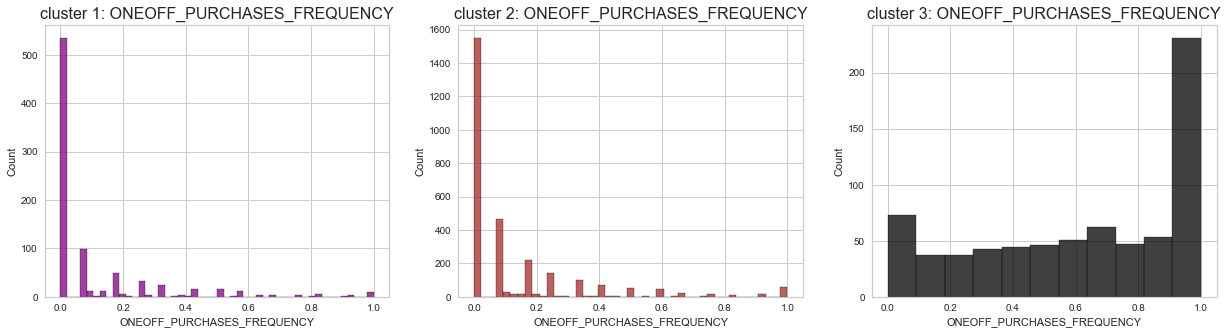

In [107]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['ONEOFF_PURCHASES_FREQUENCY'], color = 'purple')
plt.title('cluster 1: ONEOFF_PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['ONEOFF_PURCHASES_FREQUENCY'], color='brown' )
plt.title('cluster 2: ONEOFF_PURCHASES_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['ONEOFF_PURCHASES_FREQUENCY'], color='black')
plt.title('cluster 3: ONEOFF_PURCHASES_FREQUENCY', size = 16);

##### 3.4.3.3.9 PURCHASES_INSTALLMENTS_FREQUENCY

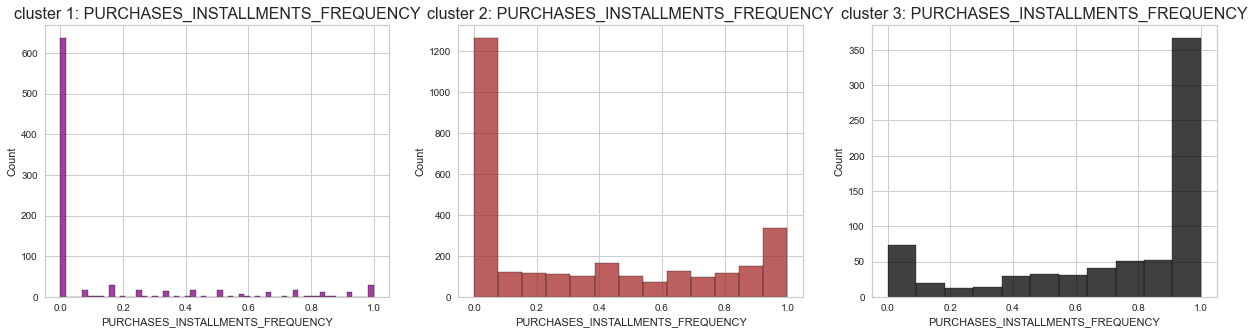

In [108]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PURCHASES_INSTALLMENTS_FREQUENCY'], color = 'purple')
plt.title('cluster 1: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PURCHASES_INSTALLMENTS_FREQUENCY'], color='brown' )
plt.title('cluster 2: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES_INSTALLMENTS_FREQUENCY'], color='black')
plt.title('cluster 3: PURCHASES_INSTALLMENTS_FREQUENCY', size = 16);

##### 3.4.3.3.10 CASH_ADVANCE_FREQUENCY

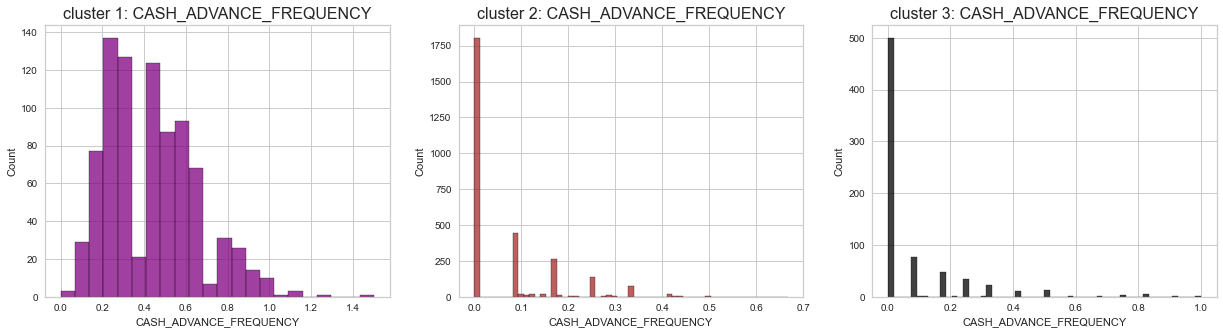

In [109]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CASH_ADVANCE_FREQUENCY'], color = 'purple')
plt.title('cluster 1: CASH_ADVANCE_FREQUENCY', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['CASH_ADVANCE_FREQUENCY'], color='brown' )
plt.title('cluster 2: CASH_ADVANCE_FREQUENCY', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['CASH_ADVANCE_FREQUENCY'], color='black')
plt.title('cluster 3: CASH_ADVANCE_FREQUENCY', size = 16);

##### 3.4.3.3.11 CASH_ADVANCE_TRX

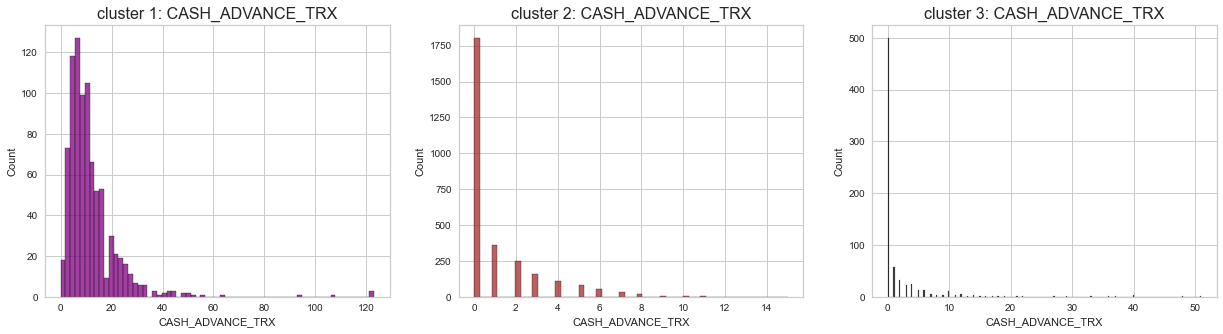

In [110]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CASH_ADVANCE_TRX'], color = 'purple')
plt.title('cluster 1: CASH_ADVANCE_TRX', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['CASH_ADVANCE_TRX'], color='brown' )
plt.title('cluster 2: CASH_ADVANCE_TRX', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['CASH_ADVANCE_TRX'], color='black')
plt.title('cluster 3: CASH_ADVANCE_TRX', size = 16);

##### 3.4.3.3.12 PURCHASES_TRX

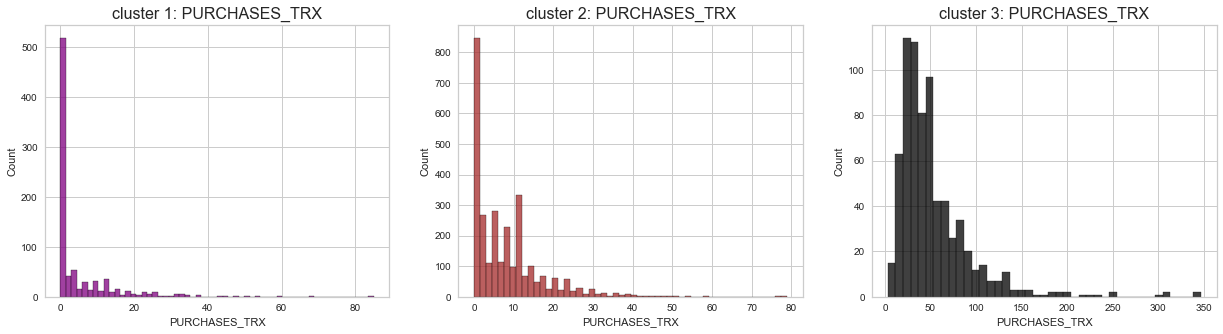

In [111]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PURCHASES_TRX'], color = 'purple')
plt.title('cluster 1: PURCHASES_TRX', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PURCHASES_TRX'], color='brown' )
plt.title('cluster 2: PURCHASES_TRX', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PURCHASES_TRX'], color='black')
plt.title('cluster 3: PURCHASES_TRX', size = 16);

##### 3.4.3.3.13 CREDIT_LIMIT

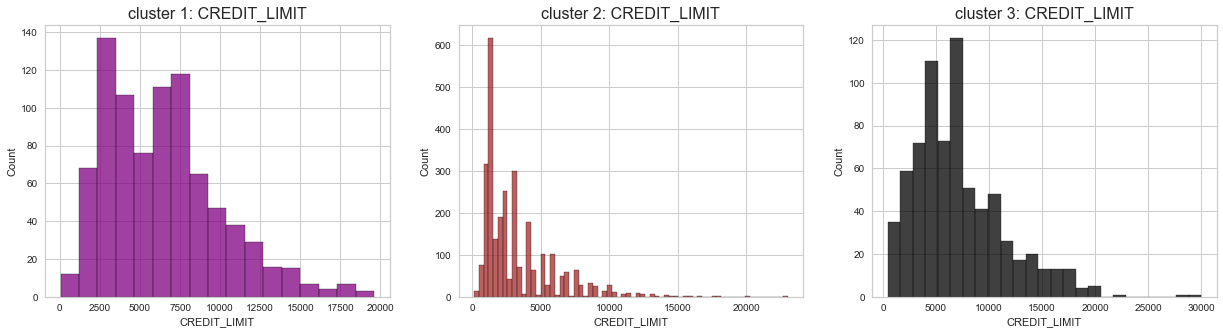

In [112]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['CREDIT_LIMIT'], color = 'purple')
plt.title('cluster 1: CREDIT_LIMIT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['CREDIT_LIMIT'], color='brown' )
plt.title('cluster 2: CREDIT_LIMIT', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['CREDIT_LIMIT'], color='black')
plt.title('cluster 3: CREDIT_LIMIT', size = 16);

##### 3.4.3.3.14 PAYMENTS

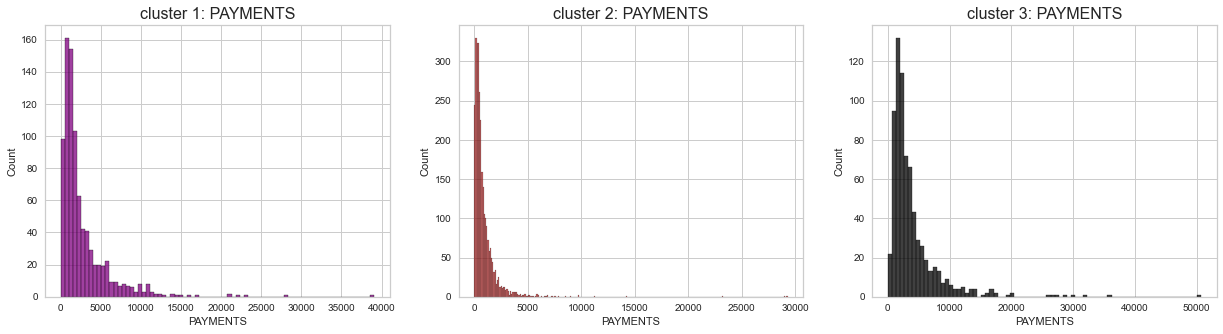

In [113]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PAYMENTS'], color = 'purple')
plt.title('cluster 1: PAYMENTS', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PAYMENTS'], color='brown' )
plt.title('cluster 2: PAYMENTS', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PAYMENTS'], color='black')
plt.title('cluster 3: PAYMENTS', size = 16);

##### 3.4.3.3.15 MINIMUM_PAYMENTS

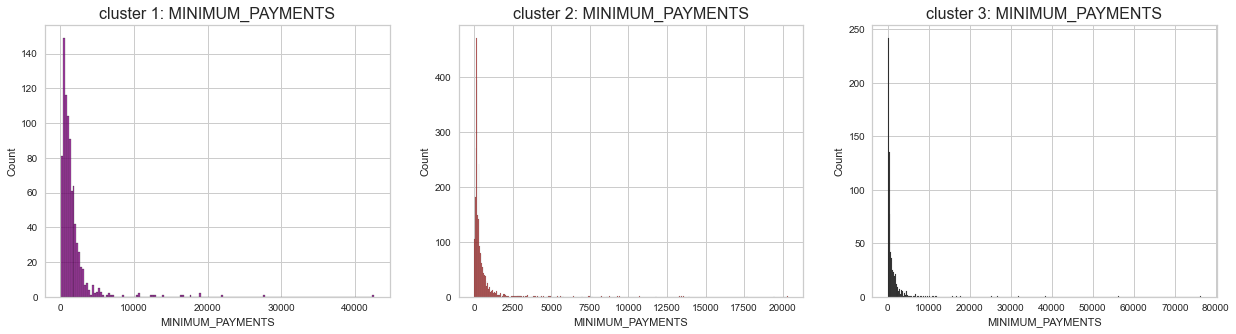

In [114]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['MINIMUM_PAYMENTS'], color = 'purple')
plt.title('cluster 1: MINIMUM_PAYMENTS', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['MINIMUM_PAYMENTS'], color='brown' )
plt.title('cluster 2: MINIMUM_PAYMENTS', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['MINIMUM_PAYMENTS'], color='black')
plt.title('cluster 3: MINIMUM_PAYMENTS', size = 16);

##### 3.4.3.3.16 PRC_FULL_PAYMENT

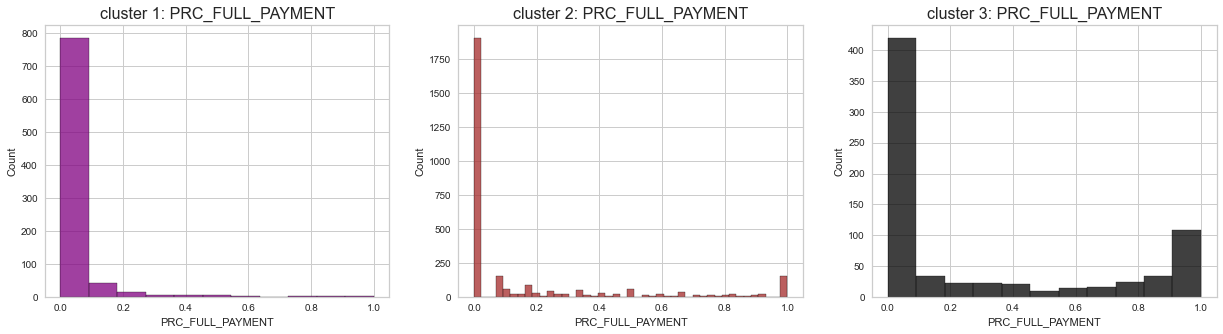

In [115]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['PRC_FULL_PAYMENT'], color = 'purple')
plt.title('cluster 1: PRC_FULL_PAYMENT', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['PRC_FULL_PAYMENT'], color='brown' )
plt.title('cluster 2: PRC_FULL_PAYMENT', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['PRC_FULL_PAYMENT'], color='black')
plt.title('cluster 3: PRC_FULL_PAYMENT', size = 16);

##### 3.4.3.3.17 TENURE

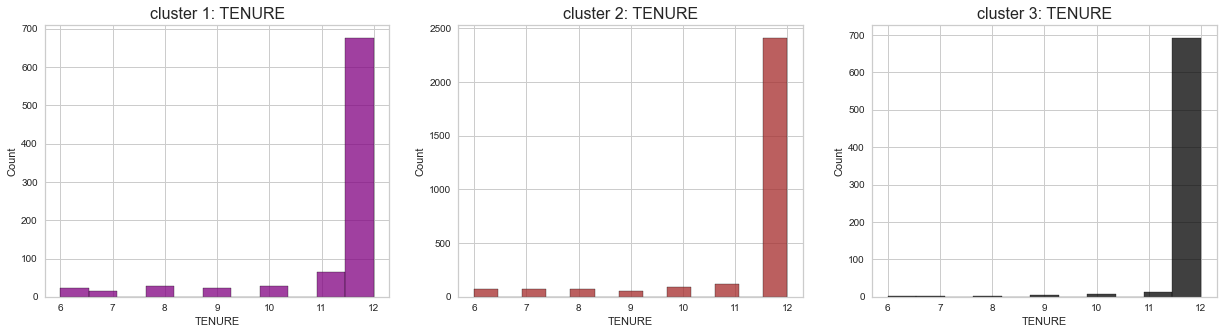

In [116]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
sns.histplot(cluster_1['TENURE'], color = 'purple')
plt.title('cluster 1: TENURE', size = 16)
plt.subplot(1,3,2)
sns.histplot(cluster_2['TENURE'], color='brown' )
plt.title('cluster 2: TENURE', size = 16)
plt.subplot(1,3,3)
sns.histplot(cluster_3['TENURE'], color='black')
plt.title('cluster 3: TENURE', size = 16);

### 3.4.4 Kesimpulan hasil segmentasi

Saya mendapati segmentasi dari hasil clustering sebagai berikut:

cluster 1:
- Mempunyai isi uang kebanyakan dibawah 8000 untuk melakukan pembelian
- Selalu update uang yang tersedia
- hanya mempunyai jumlah semua pembelian yang kebanyakan dibawah 1000
- maksimum sekali pembelian sangat sedikit, berhenti pada 2000 an walau ada 1 yang 3000
- Pendaftaran nasabah tidak dikenakan biaya apapun
- Jarang melakukan pembelian
- Jarang melakukan sekali pembelian
- Kadang-kadang melakukan pembayaran hutang, lebih sering dibanding cluster lainnya
- Jarang melakukan transaksi pembayaran
- Mempunyai kredit limit yang beragam

cluster 2:
- Mempunyai isi uang dibawah 2000 untuk melakukan pembelian
- Selalu update uang yang tersedia beragam dari yang jarang sampai sering, namun masih mayoritas selalu update
- Mempunyai jumlah pembelian semua yang beragam dibawah 1500 namun turun secara perlahan dan paling banyak masih 0,
- maksimum sekali pembelian sangat sedikit, berhenti pada 2500 an
- Dana pendaftaran berhenti banyak pada jumlah 500 an
- Frekuensi pembelian jarang
- Sedikit melakukan sekali pembelian
- Agak jarang frekuensi pembayaran hutang
- Sedikit melakukan transaksi pembayaran
- Mempunyai kredit limit sekitar 4000 an

cluster 3:
- Mempunyai isi uang dibawah 7500 untuk melakukan pembelian
- Selalu update uang yang tersedia
- Mempunyai jumlah pembelian semua yang pada titik tengahnya berada pada sekitar 3000 an dan tidak ada yang 0 pembeliannya, 
- Mempunyai batas maksimum untuk sekali pembelian yang lebih beragam, 
- Maksimum sekali pembelian berhenti berjumlah banyak pada 7500, namun masih ada yang sampai 40000 an
- Dana pendaftaran berhenti banyak pada jumlah 3000 an
- Selalu melakukan pembelian
- Sering melakukan sekali pembelian
- Lebih jarang dibanding cluster 2 sering membayar hutang
- Sering melakukan transaksi pembayaran
- Kredit limit beragam namun paling banyak pada 7500 an

Cluster 1 mempunyai jumlah pembelian yang sedikit namun sering membayar hutangnya walaupun isi uang pada credit itu sangat besar.

cluster 2 mempunyai mempunyai jumlah pembelian yang sedang namun jarang membayar hutangnya.

cluster 3 mempunyai jumlah pembelian yang besar dan sering melakukan pembelian namun jarang membayar hutangnya

Hasil segmentasinya adalah sebagai berikut:


Cluster 1: nasabah dengan purchase power yang sedikit

Cluster 2: nasabah dengan purchase power yang sedang

Cluster 3: nasabah dengan purchase power yang besar

## 3.5 Kesimpulan Akhir

Clustering sudah dilakukan dan ditemukan 3 segmentasi customer yang bisa digunakan untuk pemilihan keputusan manajemen ataupun departemen perusahaan yang lain. Terdapat beberapa saran:

- Buat sistem agar kolom data 'MINIMUM_PAYMENTS' terisi semua, karena jika terdapati isi 'missing value', artinya saya juga tidak bisa mengatakan apakah data itu 0 atau belum didapati atau terjadi kerusakan perangkat kartu atau lain sebagainya.
- Bank bisa menawarkan pelayanan kredit/asuransi kepada nasabah yang berada pada cluster 3, karena mereka mempunyai purchase power yang besar dan tidak terlalu terbebani secara finansial.

# 4. Pertanyaan

## 4.1 Pertanyaan 1

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Jawaban:

Menurut catatan di Google Colab:
Inertia adalah jumlah dari semua jarak kuadrat diantara setiap terjadinya pelatihan dan pusat massa terdekat. 

Menurut Code Academy:
Inertia mengukur seberapa baik sebuah dataset untuk dikelompokan oleh K-MEeans. Dapat dihitung dengan cara mengukur jarak diantara setiap titik data dan pusat massa datanya, lalu mengkuadratkan jaraknya, dan terus menjumlahkan kuadratnya yang di satu kelompok atau cluster.

Model yang baik adalah yang mempunyai inertia yang sedikit dan mempunyai jumlah kelompok (clusters) yang sedikit. Namun, jika K meningkat, Inertia menurun.

Source:

https://colab.research.google.com/github/ardhiraka/FSDS_Guidelines/blob/master/p1/v3/w3/P1W3D2AM%20-%20Clustering%20-%20Part%201.ipynb#scrollTo=LqsuqX0h-4YI

https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet

## 4.2 Pertanyaan 2

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Jawaban:

Metode yang digunakan untuk menentukan nomor optimal dari kelompok (Clusters) dalam pengelompokan K-means. Elbow Method melakukan plotting nilai dari cost function yang buat oleh nilai K yang berbeda-beda. 

Ketika K naik, rata-rata distorsi akan berkurang serta setiap kelompok (Cluster) akan memiliki constituent instances dan instance akan lebih mendekati masing-masing centroid (atau titik tengah masing-masing kelompok).

Namun, peningkatan rata-rata distorsi akan menurun dengan meningkatnya K. Nilai K dimana ada peningkatan dari penurunan distorsi itulah yang disebut Elbow (atau dalam arti langsung 'Siku'), dimana kita harus memberhentikan pembagian data yang mau jadi kelompok (cluster) lebih lanjut.

Kelamahan Elbow Method:
Karena dua cluster relatif dekat satu sama lain, Elbow Method membuat kita berpikir bahwa cluster itu hanya satu karena jika kita menempatkan centroid di antara kedua cluster, jarak relatif dari titik data ke sana akan pendek.

Kelebihan Elbow Method:
Kalkulasi lebih sederhana dibandingkan Silhouette Score.

Sources:

https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/c71ea970-0f3c-4973-8d3a-b09a7a6553c1.xhtml

https://medium.com/geekculture/stop-using-the-elbow-method-96bcfbbbe9fd

https://vitalflux.com/elbow-method-silhouette-score-which-better/



## 4.3 Pertanyaan 3

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

Jawaban:

Saya memakai 3 algoritma clustering, yaitu adalah:

1. K-Means
2. Agglomerative Clustering
3. Spectral Clustering

1. K-Means

Adalah algoritma iteratif yang mecoba mempartisi kumpulan data untuk menjadi subkelompok (cluster) berbeda yang tidak tumpang tindihyang telah ditentukan sebelumnya dimana satu titik hanya dimiliki oleh satu grup. Lalu juga menjaga antara titik data sesama cluster semirip mungkin dan menjauhi (hingga berbeda) titik data cluster lainnya.Ini juga menetapkan titik data ke sebuah cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan centroid cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) adalah minimum. Semakin sedikit variasi yang kita miliki dalam cluster, semakin homogen (mirip) titik data berada dalam cluster yang sama.

2. Agglomerative Clustering

Adalah jenis algoritma pengelompokan hierarkis. Ini adalah teknik pembelajaran mesin tanpa pengawasan yang membagi populasi menjadi beberapa cluster sehingga titik data dalam cluster yang sama lebih mirip dan titik data dalam cluster yang berbeda tidak serupa.

3. Spectral Clustering

Adalah teknik EDA yang mereduksi kumpulan data multidimensi yang kompleks menjadi kumpulan data serupa dalam dimensi yang lebih jarang. Secara garis besarnya adalah untuk mengelompokkan semua spektrum titik data yang tidak terorganisir ke dalam beberapa kelompok berdasarkan keunikannya (yaitu titik data) yang terhubung atau langsung bersebelahan diidentifikasi dalam grafik. Node kemudian dipetakan ke ruang dimensi rendah yang dapat dengan mudah dipisahkan untuk membentuk cluster. Pengelompokan Spektral menggunakan informasi dari nilai eigen (spektrum) dari matriks khusus (yaitu Matriks Afinitas, Matriks Derajat, dan Matriks Laplacian) yang berasal dari grafik atau kumpulan data.

Source:

K-Means:
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

Agglomerative Clustering:

https://towardsdatascience.com/agglomerative-clustering-and-dendrograms-explained-29fc12b85f23


Spectral Clustering:
https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/